In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
import os

file_path = "C:\\Users\\praha\\OneDrive\\Documents\\Projects\\Store Sales\\store-sales-time-series-forecasting\\holidays_events.csv"

if os.path.exists(file_path):
    print("File exists!")
else:
    print("File does not exist. Please check the file path.")


File exists!


In [4]:
train=pd.read_csv("C:\\Users\\praha\\OneDrive\\Documents\\Projects\\Store Sales\\store-sales-time-series-forecasting\\train.csv")
holiday=pd.read_csv("C:\\Users\\praha\\OneDrive\\Documents\\Projects\\Store Sales\\store-sales-time-series-forecasting\\holidays_events.csv")
oil_prices=pd.read_csv("C:\\Users\\praha\\OneDrive\\Documents\\Projects\\Store Sales\\store-sales-time-series-forecasting\\oil.csv")
transactions=pd.read_csv("C:\\Users\\praha\\OneDrive\\Documents\\Projects\\Store Sales\\store-sales-time-series-forecasting\\transactions.csv")
stores=pd.read_csv("C:\\Users\\praha\\OneDrive\\Documents\\Projects\\Store Sales\\store-sales-time-series-forecasting\\stores.csv")

In [5]:
print(train.columns)
print(holiday.columns)
print(oil_prices.columns)
print(transactions.columns)
print(stores.columns)

Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion'], dtype='object')
Index(['date', 'type', 'locale', 'locale_name', 'description', 'transferred'], dtype='object')
Index(['date', 'dcoilwtico'], dtype='object')
Index(['date', 'store_nbr', 'transactions'], dtype='object')
Index(['store_nbr', 'city', 'state', 'type', 'cluster'], dtype='object')


In [6]:
print("train  ")
print(train.isnull().sum())
print("Holiday")
print(holiday.isnull().sum())
print("Oil Prices")
print(oil_prices.isnull().sum())
print("transactions ")
print(transactions.isnull().sum())
print("Stores ")
print(stores.isnull().sum())

train  
id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64
Holiday
date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64
Oil Prices
date           0
dcoilwtico    43
dtype: int64
transactions 
date            0
store_nbr       0
transactions    0
dtype: int64
Stores 
store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64


In [7]:
print("train  ")
print(train.dtypes)
print("Holiday")
print(holiday.dtypes)
print("Oil Prices")
print(oil_prices.dtypes)
print("transactions ")
print(transactions.dtypes)
print("Stores ")
print(stores.dtypes)

train  
id               int64
date            object
store_nbr        int64
family          object
sales          float64
onpromotion      int64
dtype: object
Holiday
date           object
type           object
locale         object
locale_name    object
description    object
transferred      bool
dtype: object
Oil Prices
date           object
dcoilwtico    float64
dtype: object
transactions 
date            object
store_nbr        int64
transactions     int64
dtype: object
Stores 
store_nbr     int64
city         object
state        object
type         object
cluster       int64
dtype: object


In [8]:
train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


                  sales
family                 
AUTOMOTIVE     554822.0
BABY CARE       10051.0
BEAUTY         337893.0
BEVERAGES   216954486.0
BOOKS            6438.0


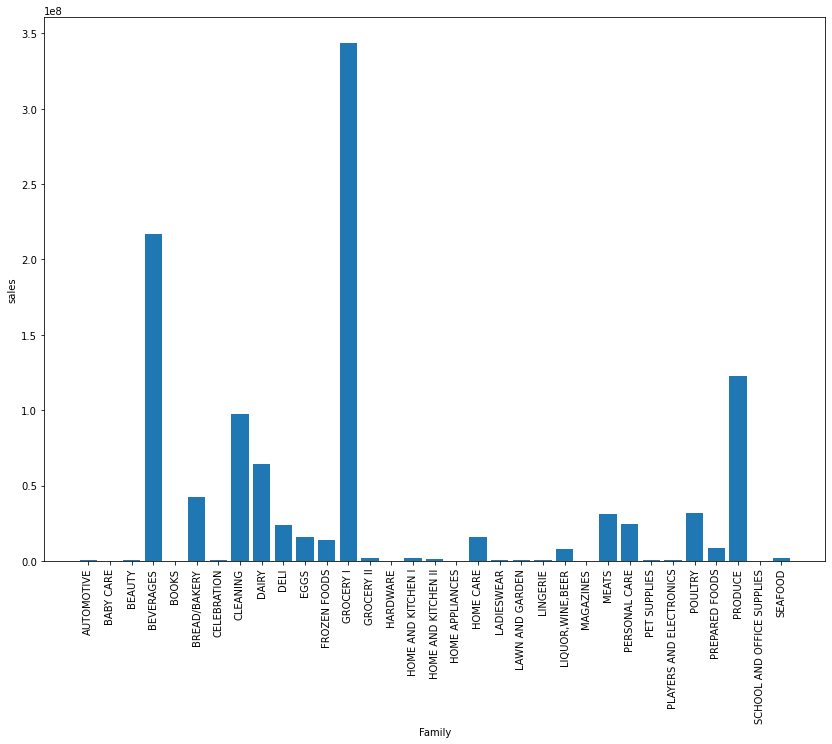

In [14]:
#grouped based on family
family_grouped=pd.DataFrame(train['sales'].groupby(train["family"]).sum())
print(family_grouped.head())
family_grouped = family_grouped.reset_index()
family_grouped.columns = ['family', 'total_sales']
plt.figure(figsize=(14,10))
plt.bar(family_grouped.family,family_grouped.total_sales)
plt.xlabel("Family")
plt.ylabel("sales",)
plt.xticks(rotation=90)
plt.show()

In [18]:
train.shape

(3000888, 6)

In [19]:
train.describe()

,id,store_nbr,sales,onpromotion
count,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06
mean,1.500444e+06,2.750000e+01,3.577757e+02,2.602770e+00
std,8.662819e+05,1.558579e+01,1.101998e+03,1.221888e+01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,7.502218e+05,1.400000e+01,0.000000e+00,0.000000e+00
50%,1.500444e+06,2.750000e+01,1.100000e+01,0.000000e+00
75%,2.250665e+06,4.100000e+01,1.958473e+02,0.000000e+00
max,3.000887e+06,5.400000e+01,1.247170e+05,7.410000e+02


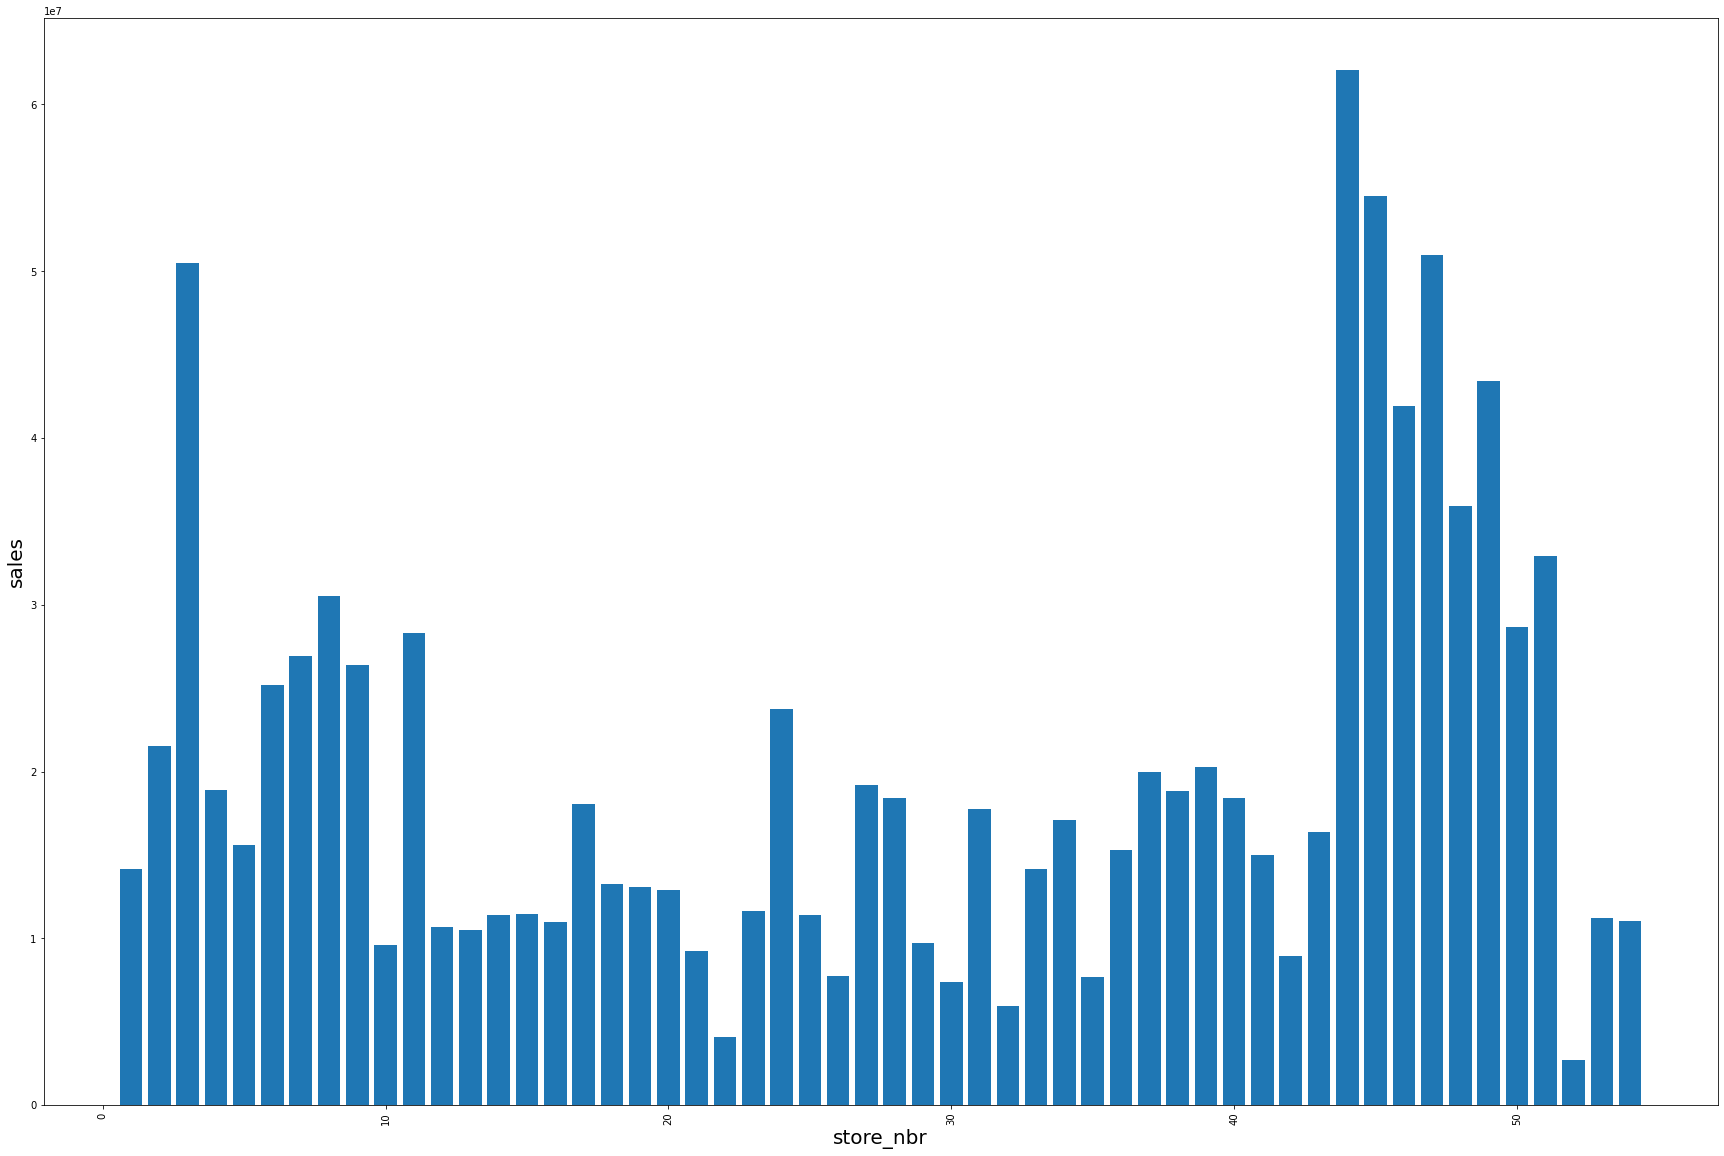

In [18]:
#groupedby store_number
family_grouped=pd.DataFrame(train['sales'].groupby(train.store_nbr).sum())

family_grouped = family_grouped.reset_index()
family_grouped.columns = ['store_nbr', 'total_sales']
plt.figure(figsize=(30,20))
plt.bar(family_grouped.store_nbr,family_grouped.total_sales)
plt.xlabel("store_nbr",fontsize=20)
plt.ylabel("sales",fontsize=20)
plt.xticks(rotation=90)

plt.show()

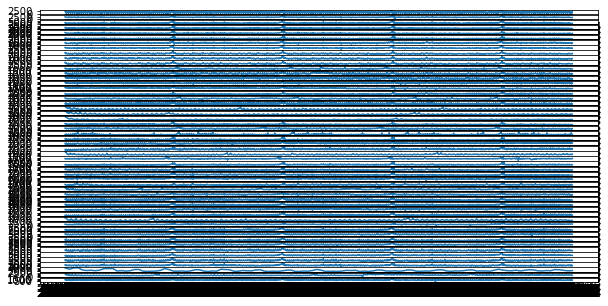

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

In [19]:
trans_stores = {}
fig, axs = plt.subplots(nrows=transactions['store_nbr'].nunique(), ncols=1, figsize=(10,5 ))
for i in range(transactions['store_nbr'].nunique()):
    trans_stores[i]=transactions[transactions['store_nbr']==i+1]
    plt.figure(figsize=(10,8))
    axs[i].plot(trans_stores[i].date,trans_stores[i].transactions)

    
    
plt.show()


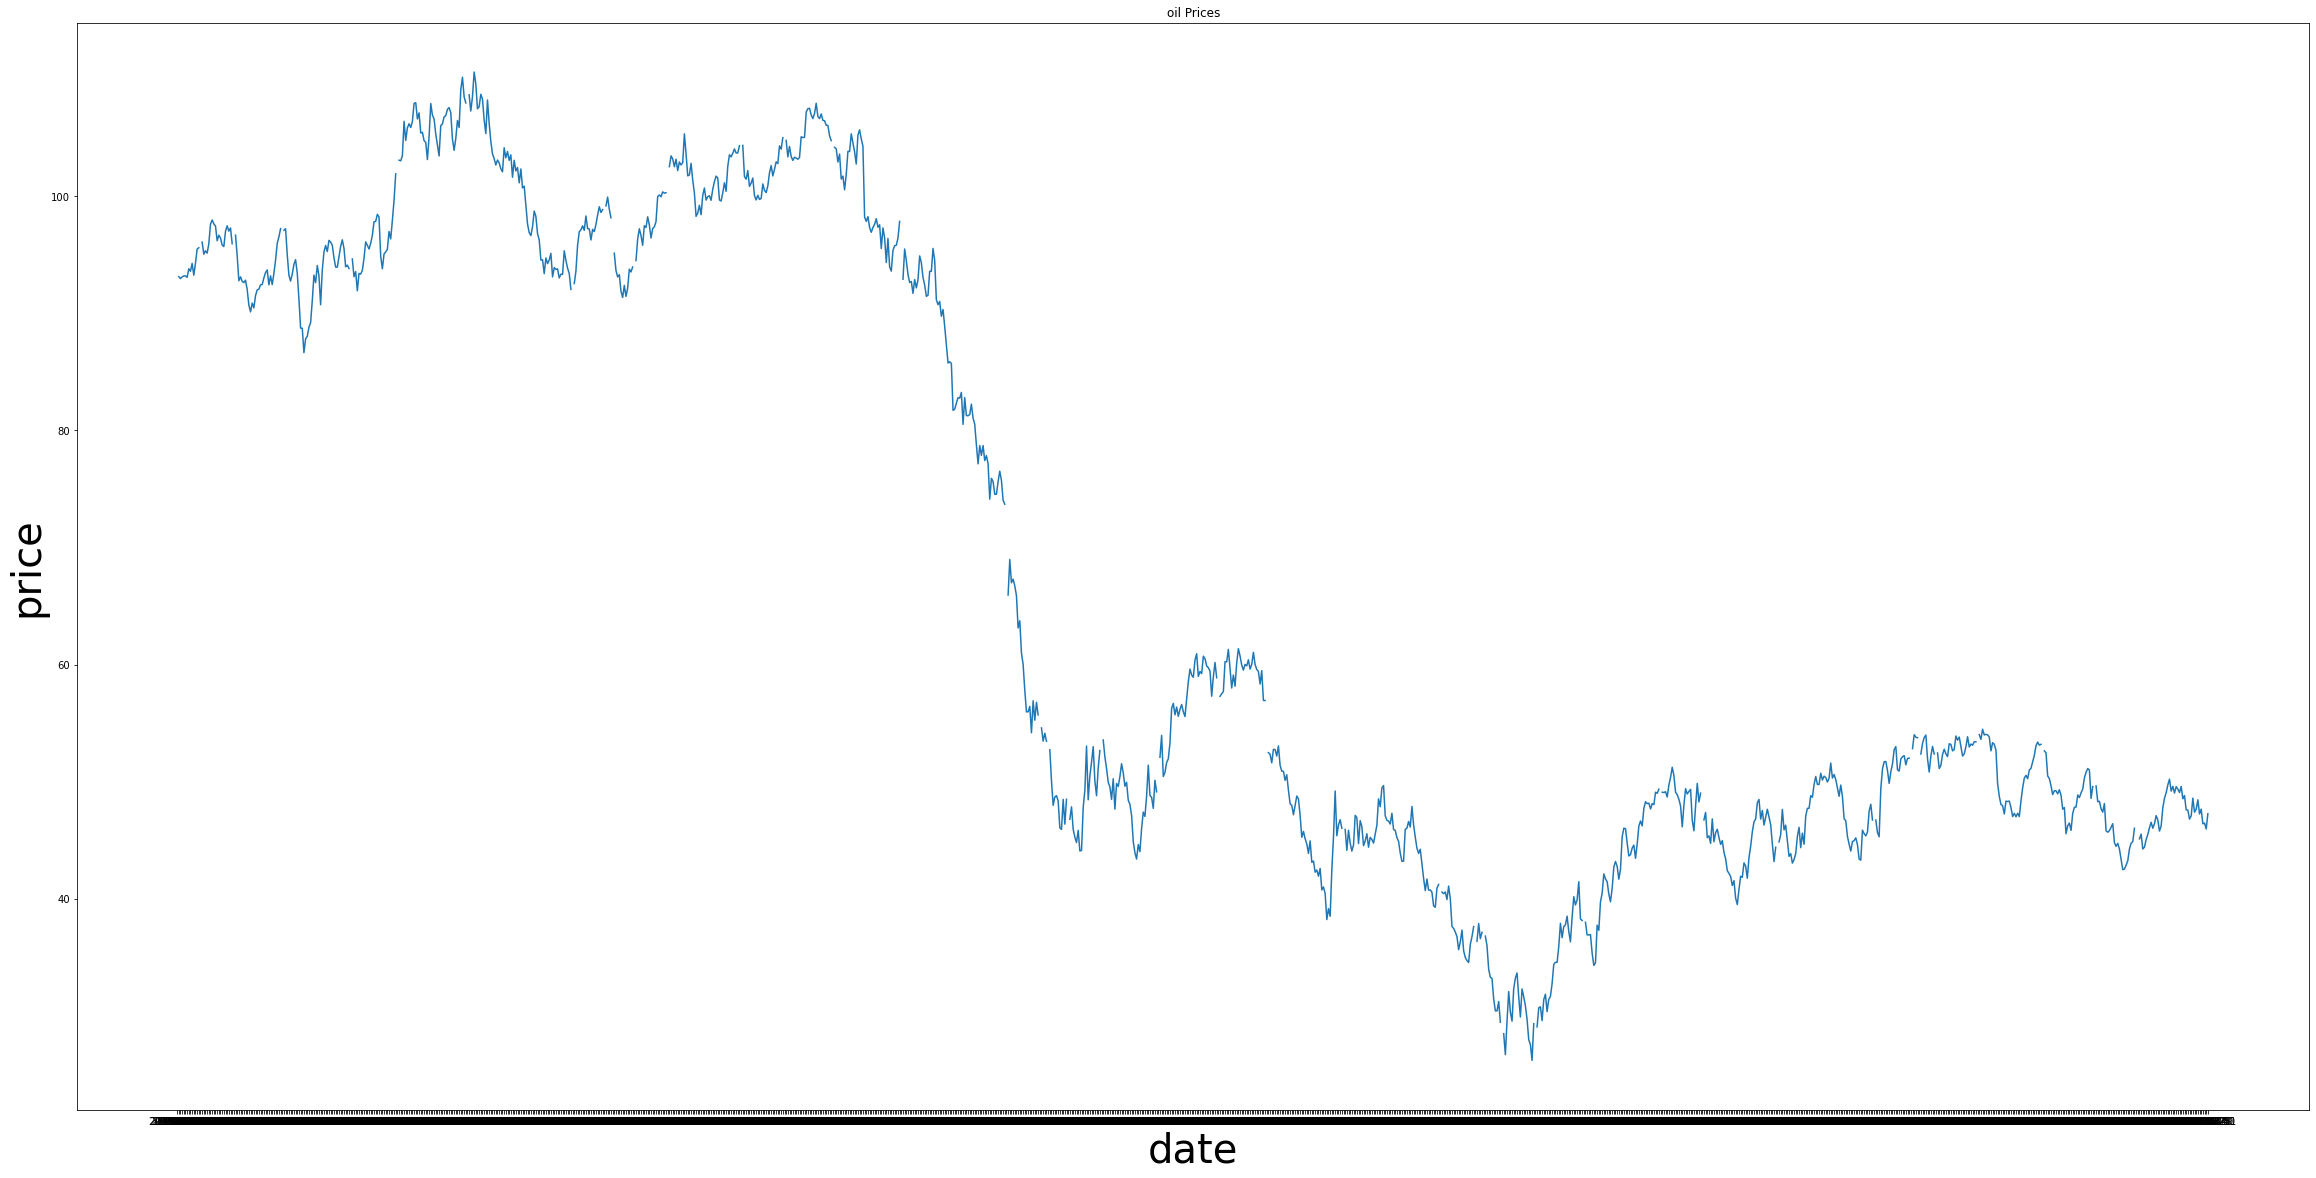

In [22]:
#plot oilprices 
plt.figure(figsize=(40,20))
plt.plot(oil_prices.date,oil_prices.dcoilwtico)
plt.xlabel("date",fontsize=40)
plt.ylabel("price",fontsize=40)
plt.xticks(rotation=90)
plt.title("oil Prices")
plt.show()

In [23]:

holiday.head()

,date,type,locale,locale_name,description,transferred
0,3/2/2012,Holiday,Local,Manta,Fundacion de Manta,False
1,4/1/2012,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,4/12/2012,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,4/14/2012,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,4/21/2012,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [24]:
merged_1=pd.merge(train,oil_prices,on='date',how='left')
merged_1.head()
merged_1.isnull().sum()

id                  0
date                0
store_nbr           0
family              0
sales               0
onpromotion         0
dcoilwtico     928422
dtype: int64

In [25]:
merged_2=pd.merge(merged_1,stores,on='store_nbr',how='left')
merged_2.head()

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,city,state,type,cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,NaN,Quito,Pichincha,D,13
1,1,2013-01-01,1,BABY CARE,0.0,0,NaN,Quito,Pichincha,D,13
2,2,2013-01-01,1,BEAUTY,0.0,0,NaN,Quito,Pichincha,D,13
3,3,2013-01-01,1,BEVERAGES,0.0,0,NaN,Quito,Pichincha,D,13
4,4,2013-01-01,1,BOOKS,0.0,0,NaN,Quito,Pichincha,D,13


In [26]:
merged_3=pd.merge(merged_2,transactions,on=['date','store_nbr'],how='left')
merged_3.head()

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,city,state,type,cluster,transactions
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,NaN,Quito,Pichincha,D,13,NaN
1,1,2013-01-01,1,BABY CARE,0.0,0,NaN,Quito,Pichincha,D,13,NaN
2,2,2013-01-01,1,BEAUTY,0.0,0,NaN,Quito,Pichincha,D,13,NaN
3,3,2013-01-01,1,BEVERAGES,0.0,0,NaN,Quito,Pichincha,D,13,NaN
4,4,2013-01-01,1,BOOKS,0.0,0,NaN,Quito,Pichincha,D,13,NaN


In [27]:
holiday_national=holiday[holiday['locale']=='National']
holiday_national = holiday_national.rename(columns={'type': 'N_Holiday'})
holiday_national=holiday_national[['date','N_Holiday']]
print(holiday_national.head())
merged_4=pd.merge(merged_3,holiday_national,on='date',how='left')
merged_4.head()

          date N_Holiday
14   8/10/2012   Holiday
19   10/9/2012   Holiday
20  10/12/2012  Transfer
21   11/2/2012   Holiday
22   11/3/2012   Holiday


,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,city,state,type,cluster,transactions,N_Holiday
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,NaN,Quito,Pichincha,D,13,NaN,NaN
1,1,2013-01-01,1,BABY CARE,0.0,0,NaN,Quito,Pichincha,D,13,NaN,NaN
2,2,2013-01-01,1,BEAUTY,0.0,0,NaN,Quito,Pichincha,D,13,NaN,NaN
3,3,2013-01-01,1,BEVERAGES,0.0,0,NaN,Quito,Pichincha,D,13,NaN,NaN
4,4,2013-01-01,1,BOOKS,0.0,0,NaN,Quito,Pichincha,D,13,NaN,NaN


In [28]:
holiday_Regional=holiday[holiday['locale']=='Regional']
holiday_Regional = holiday_Regional.rename(columns={'type': 'R_Holiday'})
holiday_Regional = holiday_Regional.rename(columns={'locale_name':'state'})
holiday_Regional=holiday_Regional[['date','R_Holiday','state']]
print(holiday_Regional.head())
merged_5=pd.merge(merged_4,holiday_Regional,on=['date','state'],how='left')
merged_5.head()

         date R_Holiday                           state
1    4/1/2012   Holiday                        Cotopaxi
7   6/25/2012   Holiday                        Imbabura
23  11/6/2012   Holiday  Santo Domingo de los Tsachilas
24  11/7/2012   Holiday                     Santa Elena
47   4/1/2013   Holiday                        Cotopaxi


,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,city,state,type,cluster,transactions,N_Holiday,R_Holiday
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,NaN,Quito,Pichincha,D,13,NaN,NaN,NaN
1,1,2013-01-01,1,BABY CARE,0.0,0,NaN,Quito,Pichincha,D,13,NaN,NaN,NaN
2,2,2013-01-01,1,BEAUTY,0.0,0,NaN,Quito,Pichincha,D,13,NaN,NaN,NaN
3,3,2013-01-01,1,BEVERAGES,0.0,0,NaN,Quito,Pichincha,D,13,NaN,NaN,NaN
4,4,2013-01-01,1,BOOKS,0.0,0,NaN,Quito,Pichincha,D,13,NaN,NaN,NaN


In [29]:
holiday_local=holiday[holiday['locale']=='Local']
holiday_local = holiday_local.rename(columns={'type': 'L_Holiday'})
holiday_local = holiday_local.rename(columns={'locale_name':'city'})
holiday_local=holiday_local[['date','L_Holiday','city']]
print(holiday_local.head())
merged_Final=pd.merge(merged_5,holiday_local,on=['date','city'],how='left')
merged_Final.head()

        date L_Holiday      city
0   3/2/2012   Holiday     Manta
2  4/12/2012   Holiday    Cuenca
3  4/14/2012   Holiday  Libertad
4  4/21/2012   Holiday  Riobamba
5  5/12/2012   Holiday      Puyo


,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,city,state,type,cluster,transactions,N_Holiday,R_Holiday,L_Holiday
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,NaN,Quito,Pichincha,D,13,NaN,NaN,NaN,NaN
1,1,2013-01-01,1,BABY CARE,0.0,0,NaN,Quito,Pichincha,D,13,NaN,NaN,NaN,NaN
2,2,2013-01-01,1,BEAUTY,0.0,0,NaN,Quito,Pichincha,D,13,NaN,NaN,NaN,NaN
3,3,2013-01-01,1,BEVERAGES,0.0,0,NaN,Quito,Pichincha,D,13,NaN,NaN,NaN,NaN
4,4,2013-01-01,1,BOOKS,0.0,0,NaN,Quito,Pichincha,D,13,NaN,NaN,NaN,NaN


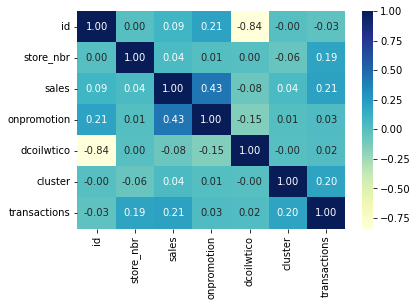

In [30]:
import seaborn as sns

cor_plot=merged_Final.corr()

sns.heatmap(cor_plot,cmap="YlGnBu", annot=True, fmt='.2f')
plt.show()

In [31]:
merged_Final.isnull().sum()

id                    0
date                  0
store_nbr             0
family                0
sales                 0
onpromotion           0
dcoilwtico       928422
city                  0
state                 0
type                  0
cluster               0
transactions     245784
N_Holiday       3000888
R_Holiday       3000888
L_Holiday       3000888
dtype: int64

In [32]:
merged_Final.dtypes

id                int64
date             object
store_nbr         int64
family           object
sales           float64
onpromotion       int64
dcoilwtico      float64
city             object
state            object
type             object
cluster           int64
transactions    float64
N_Holiday        object
R_Holiday        object
L_Holiday        object
dtype: object

In [33]:
merged_Final[merged_Final['N_Holiday']=='Holiday']=1
merged_Final['N_Holiday'].fillna(0,inplace=True)
merged_Final[merged_Final['N_Holiday']=='Event']=2
merged_Final[merged_Final['N_Holiday']=='Additional']=3
merged_Final[merged_Final['N_Holiday']=='Bridge']=4
merged_Final[merged_Final['N_Holiday']=='Transfer']=5
merged_Final[merged_Final['N_Holiday']=='Work Day']=6
merged_Final['N_Holiday']=merged_Final['N_Holiday'].astype(int)
merged_Final.head()

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,city,state,type,cluster,transactions,N_Holiday,R_Holiday,L_Holiday
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,NaN,Quito,Pichincha,D,13,NaN,0,NaN,NaN
1,1,2013-01-01,1,BABY CARE,0.0,0,NaN,Quito,Pichincha,D,13,NaN,0,NaN,NaN
2,2,2013-01-01,1,BEAUTY,0.0,0,NaN,Quito,Pichincha,D,13,NaN,0,NaN,NaN
3,3,2013-01-01,1,BEVERAGES,0.0,0,NaN,Quito,Pichincha,D,13,NaN,0,NaN,NaN
4,4,2013-01-01,1,BOOKS,0.0,0,NaN,Quito,Pichincha,D,13,NaN,0,NaN,NaN


In [34]:
merged_Final[merged_Final['R_Holiday']=='Holiday']=1
merged_Final['R_Holiday'].fillna(0,inplace=True)
merged_Final['R_Holiday']=merged_Final['R_Holiday'].astype(int)
merged_Final.head()

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,city,state,type,cluster,transactions,N_Holiday,R_Holiday,L_Holiday
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,NaN,Quito,Pichincha,D,13,NaN,0,0,NaN
1,1,2013-01-01,1,BABY CARE,0.0,0,NaN,Quito,Pichincha,D,13,NaN,0,0,NaN
2,2,2013-01-01,1,BEAUTY,0.0,0,NaN,Quito,Pichincha,D,13,NaN,0,0,NaN
3,3,2013-01-01,1,BEVERAGES,0.0,0,NaN,Quito,Pichincha,D,13,NaN,0,0,NaN
4,4,2013-01-01,1,BOOKS,0.0,0,NaN,Quito,Pichincha,D,13,NaN,0,0,NaN


In [35]:
merged_Final[merged_Final['L_Holiday']=='Holiday']=1
merged_Final['L_Holiday'].fillna(0,inplace=True)
merged_Final[merged_Final['L_Holiday']=='Additional']=2
merged_Final[merged_Final['N_Holiday']=='Transfer']=3
merged_Final['L_Holiday']=merged_Final['L_Holiday'].astype(int)
merged_Final.head()

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,city,state,type,cluster,transactions,N_Holiday,R_Holiday,L_Holiday
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,NaN,Quito,Pichincha,D,13,NaN,0,0,0
1,1,2013-01-01,1,BABY CARE,0.0,0,NaN,Quito,Pichincha,D,13,NaN,0,0,0
2,2,2013-01-01,1,BEAUTY,0.0,0,NaN,Quito,Pichincha,D,13,NaN,0,0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0,NaN,Quito,Pichincha,D,13,NaN,0,0,0
4,4,2013-01-01,1,BOOKS,0.0,0,NaN,Quito,Pichincha,D,13,NaN,0,0,0


In [36]:
merged_Final.isnull().sum()

id                   0
date                 0
store_nbr            0
family               0
sales                0
onpromotion          0
dcoilwtico      928422
city                 0
state                0
type                 0
cluster              0
transactions    245784
N_Holiday            0
R_Holiday            0
L_Holiday            0
dtype: int64

In [37]:
merged_Final.dtypes

id                int64
date             object
store_nbr         int64
family           object
sales           float64
onpromotion       int64
dcoilwtico      float64
city             object
state            object
type             object
cluster           int64
transactions    float64
N_Holiday         int32
R_Holiday         int32
L_Holiday         int32
dtype: object

In [38]:
from datetime import datetime
merged_Final['date']=pd.to_datetime(merged_Final['date'])

In [39]:
merged_Final['year']=merged_Final['date'].dt.year
merged_Final['month']=merged_Final['date'].dt.month
merged_Final['day']=merged_Final['date'].dt.day

In [40]:
merged_Final['city']=merged_Final['city'].astype(str)
merged_Final['type']=merged_Final['type'].astype(str)
merged_Final['type']=merged_Final['state'].astype(str)

In [41]:
merged_Final.dtypes

id                       int64
date            datetime64[ns]
store_nbr                int64
family                  object
sales                  float64
onpromotion              int64
dcoilwtico             float64
city                    object
state                   object
type                    object
cluster                  int64
transactions           float64
N_Holiday                int32
R_Holiday                int32
L_Holiday                int32
year                     int64
month                    int64
day                      int64
dtype: object

In [42]:
#unique_state=set(merged_Final['state'])
#unique_state
#j=0
#for i in enumerate(unique_state):
 #   j=j+1
  #  for k in merged_Final['state']:
   #     if k==i:
    #       merged_Final['state']='j'
unique_states = merged_Final['state'].unique()  # get an array of unique state names
state_dict = {state: idx for idx, state in enumerate(unique_states)}  # create a dictionary mapping state names to integers
merged_Final['state'] = merged_Final['state'].replace(state_dict)  
        
      
             
        

In [43]:
unique_cities = merged_Final['city'].unique()  # get an array of unique state names
city_dict = {city: idx for idx, city in enumerate(unique_cities)}  # create a dictionary mapping state names to integers
merged_Final['city'] = merged_Final['city'].replace(city_dict)

In [44]:
unique_types = merged_Final['type'].unique()  # get an array of unique state names
type_dict = {type1: idx for idx, type1 in enumerate(unique_types)}  # create a dictionary mapping state names to integers
merged_Final['type'] = merged_Final['type'].replace(type_dict)

In [45]:
n=set(merged_Final['type'])
n

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}

In [46]:
#convert date column to day, year , month
merged_Final['year']=merged_Final['date'].dt.year
merged_Final['month']=merged_Final['date'].dt.month
merged_Final['day']=merged_Final['date'].dt.day
merged_Final.dtypes

id                       int64
date            datetime64[ns]
store_nbr                int64
family                  object
sales                  float64
onpromotion              int64
dcoilwtico             float64
city                     int64
state                    int64
type                     int64
cluster                  int64
transactions           float64
N_Holiday                int32
R_Holiday                int32
L_Holiday                int32
year                     int64
month                    int64
day                      int64
dtype: object

In [51]:
merged_Final.head()

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,city,state,type,cluster,transactions,N_Holiday,R_Holiday,L_Holiday,year,month,day
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,92.0,0,0,0,13,NaN,0,0,0,2013,1,1
1,1,2013-01-01,1,BABY CARE,0.0,0,92.0,0,0,0,13,NaN,0,0,0,2013,1,1
2,2,2013-01-01,1,BEAUTY,0.0,0,92.0,0,0,0,13,NaN,0,0,0,2013,1,1
3,3,2013-01-01,1,BEVERAGES,0.0,0,92.0,0,0,0,13,NaN,0,0,0,2013,1,1
4,4,2013-01-01,1,BOOKS,0.0,0,92.0,0,0,0,13,NaN,0,0,0,2013,1,1


In [49]:
merged_Final['dcoilwtico'] = merged_Final['dcoilwtico'].fillna(method='ffill') # fill missing values with the last known value
merged_Final['dcoilwtico'][0]=92


In [50]:
merged_Final.isnull().sum()

id                   0
date                 0
store_nbr            0
family               0
sales                0
onpromotion          0
dcoilwtico           0
city                 0
state                0
type                 0
cluster              0
transactions    245784
N_Holiday            0
R_Holiday            0
L_Holiday            0
year                 0
month                0
day                  0
dtype: int64

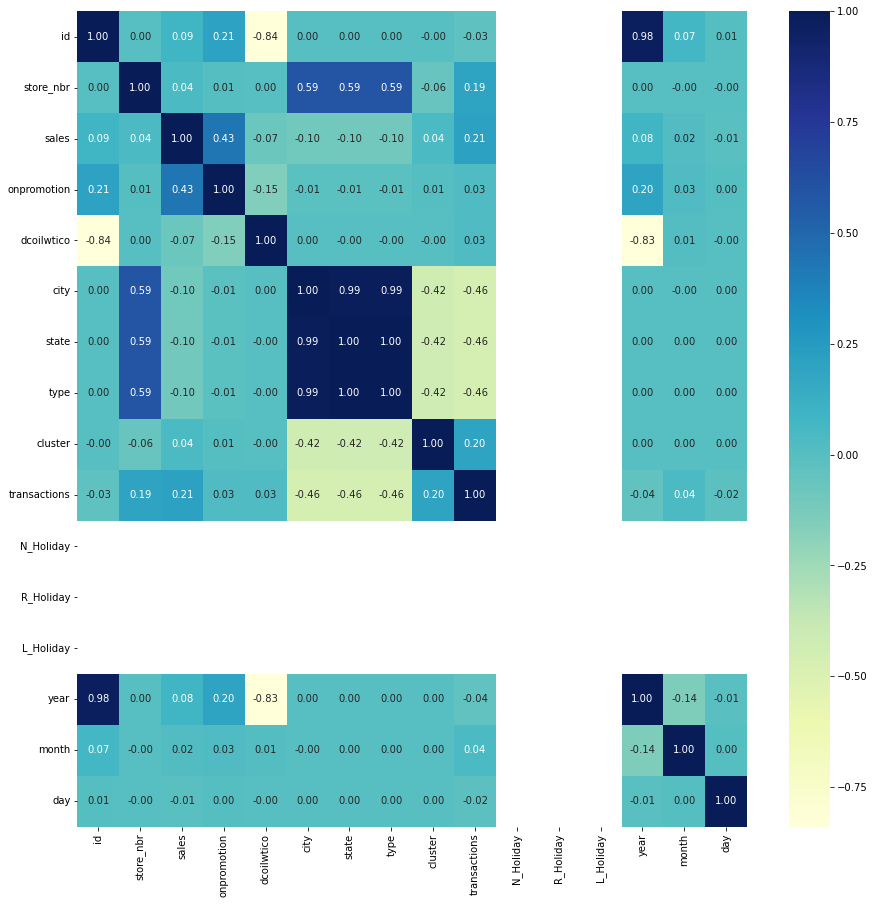

In [54]:
Corr_plot2=merged_Final.corr()
plt.figure(figsize=(15,15))
sns.heatmap(Corr_plot2,cmap="YlGnBu", annot=True, fmt='.2f')
plt.show()

In [55]:
merged_Final['family'].nunique()

33

AUTOMOTIVE


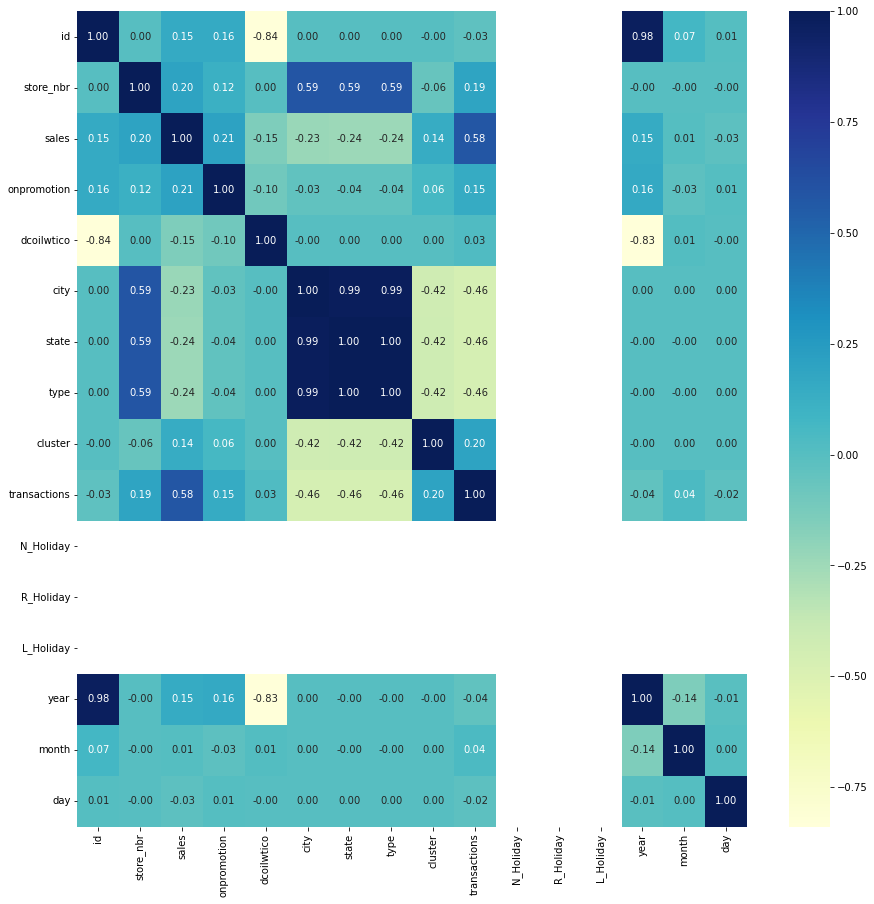

BABY CARE


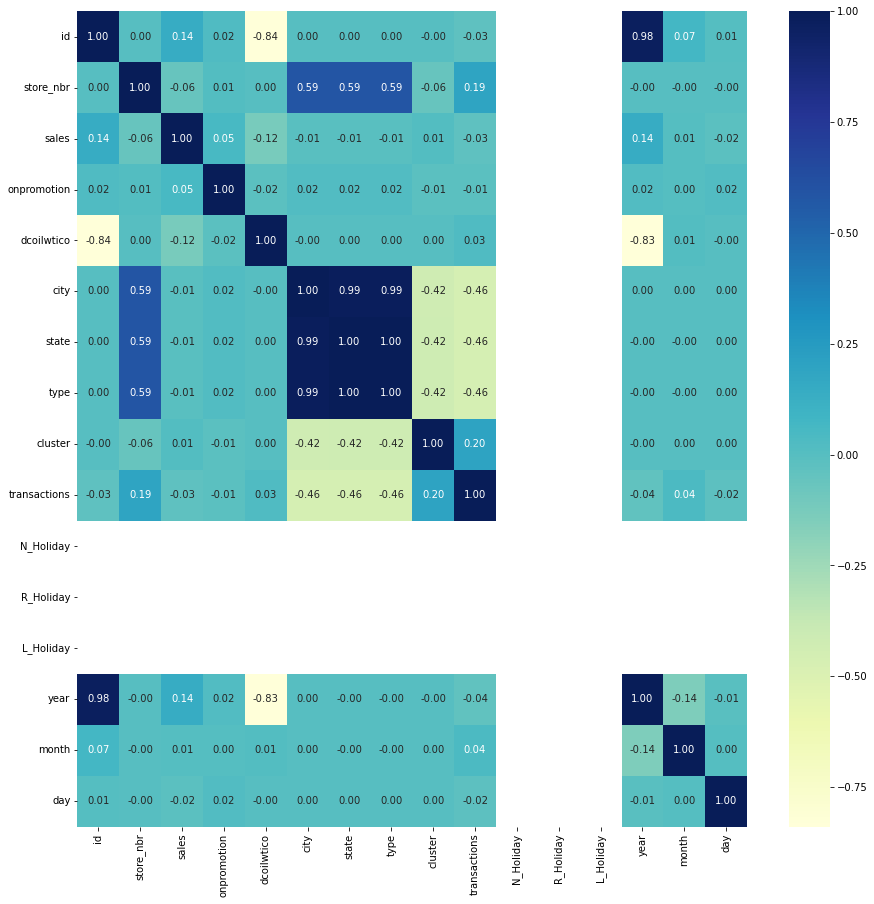

BEAUTY


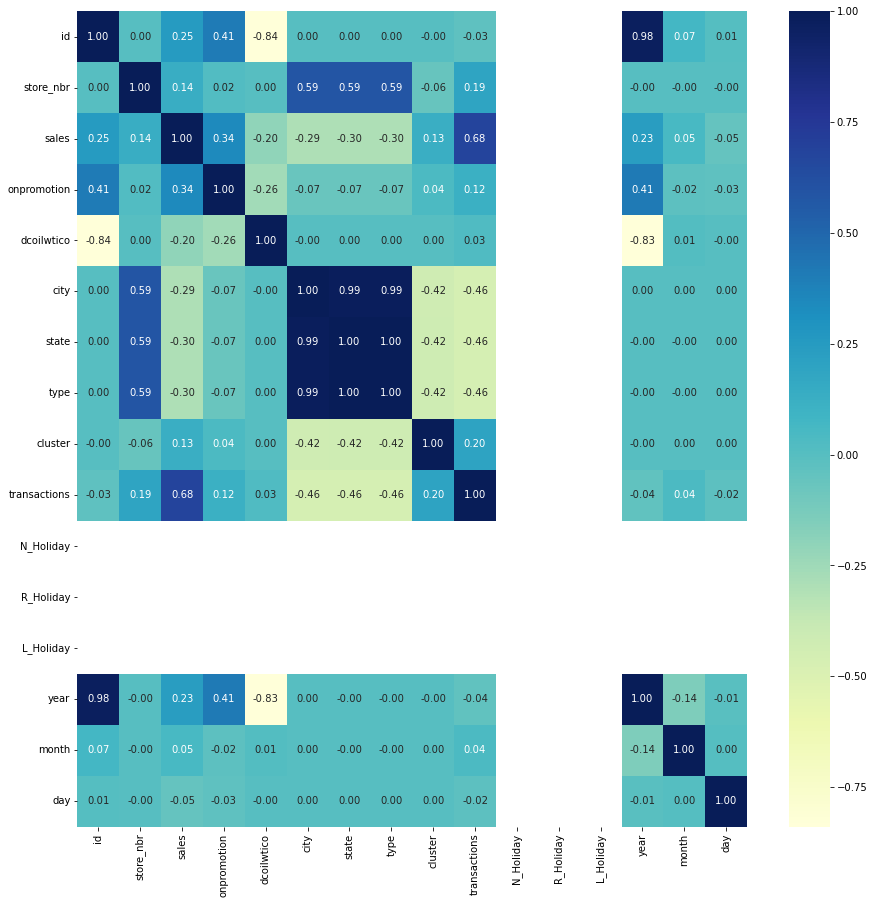

BEVERAGES


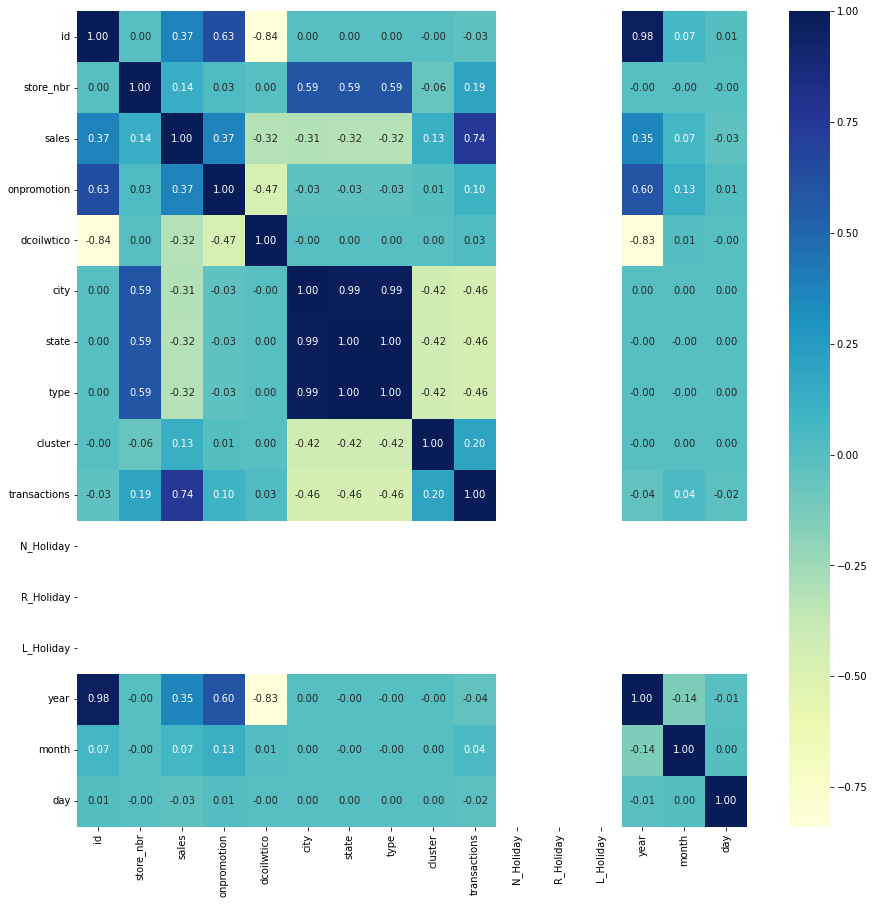

BOOKS


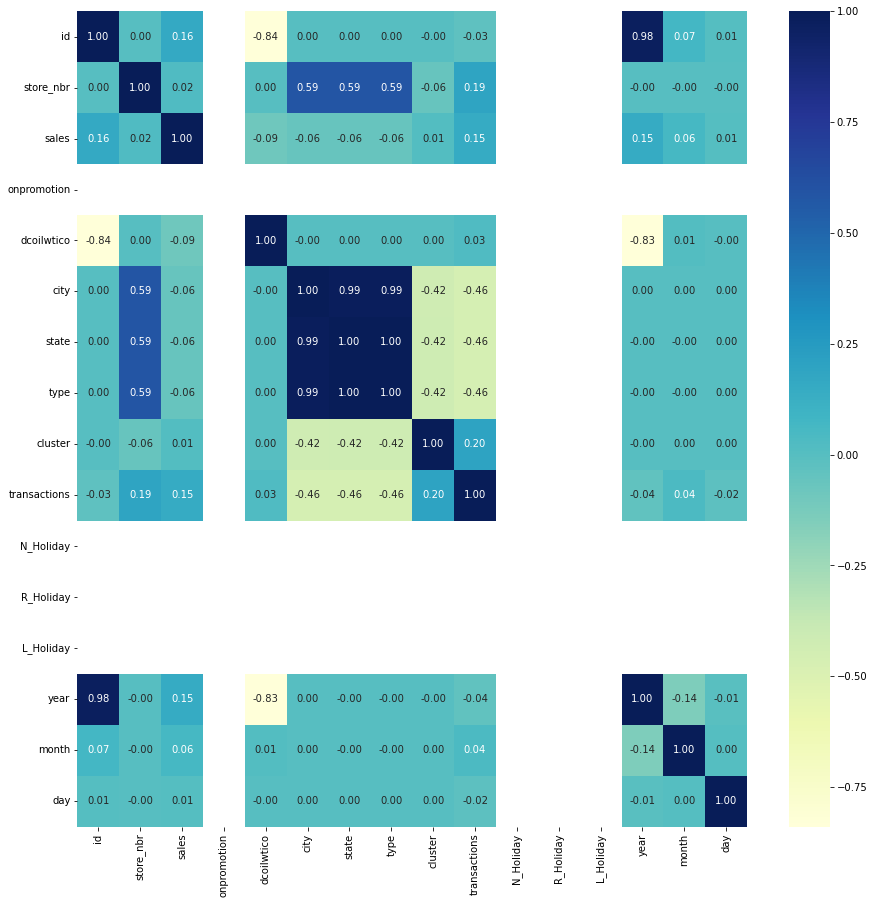

BREAD/BAKERY


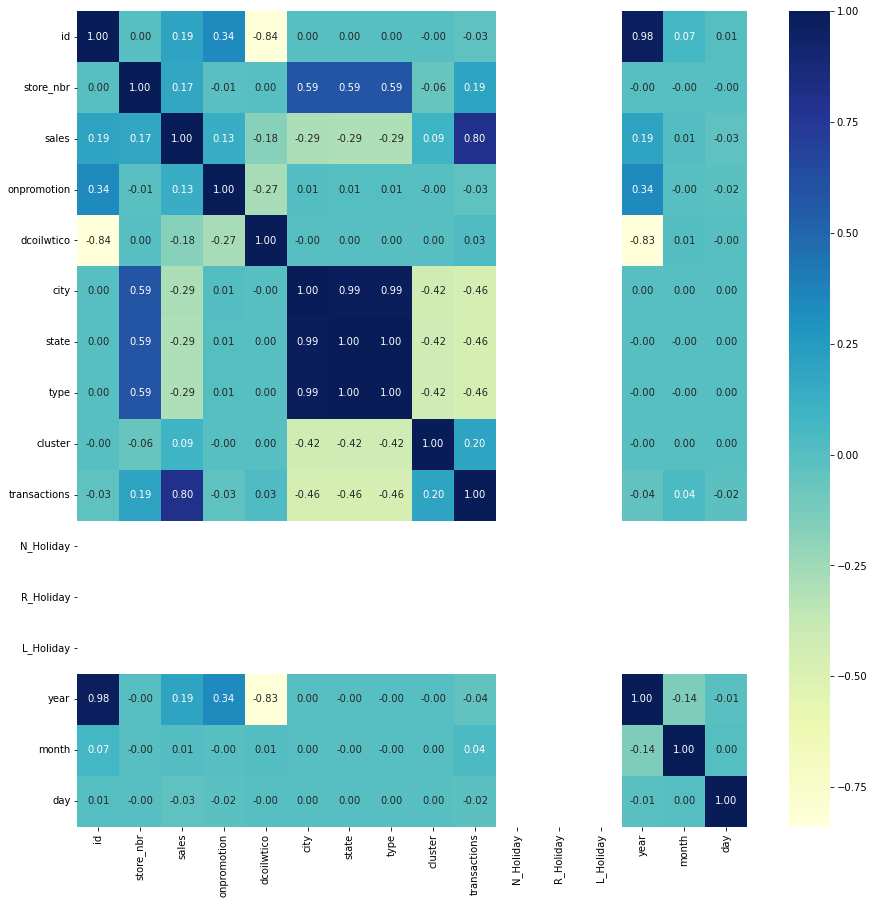

CELEBRATION


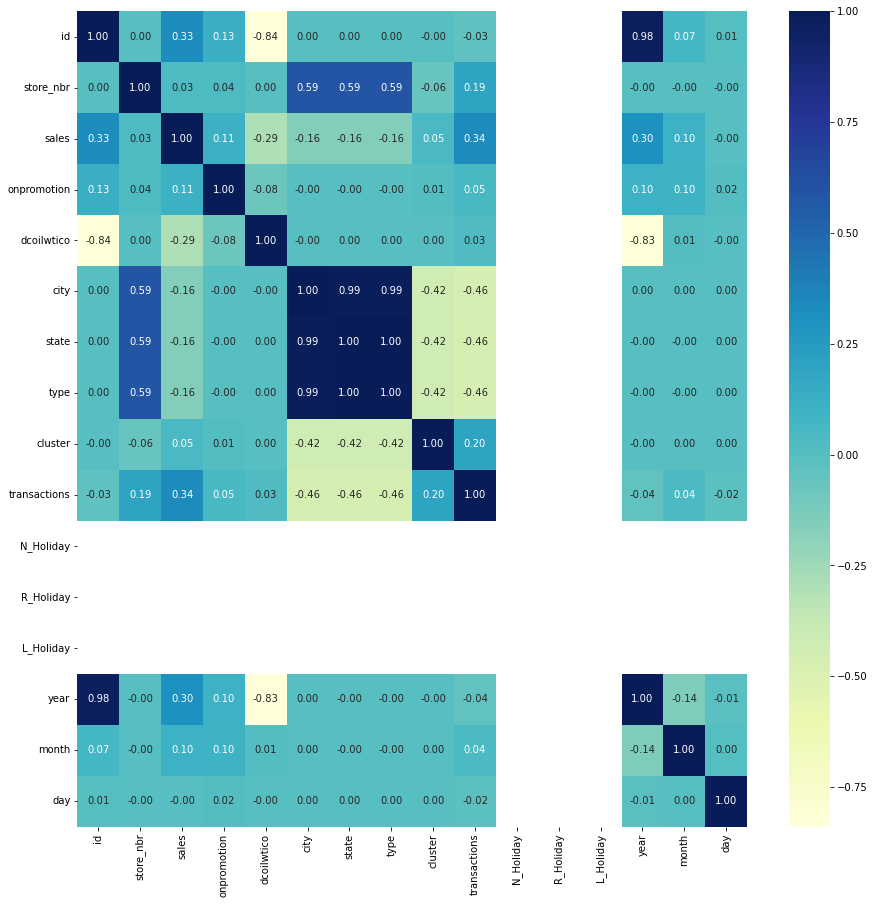

CLEANING


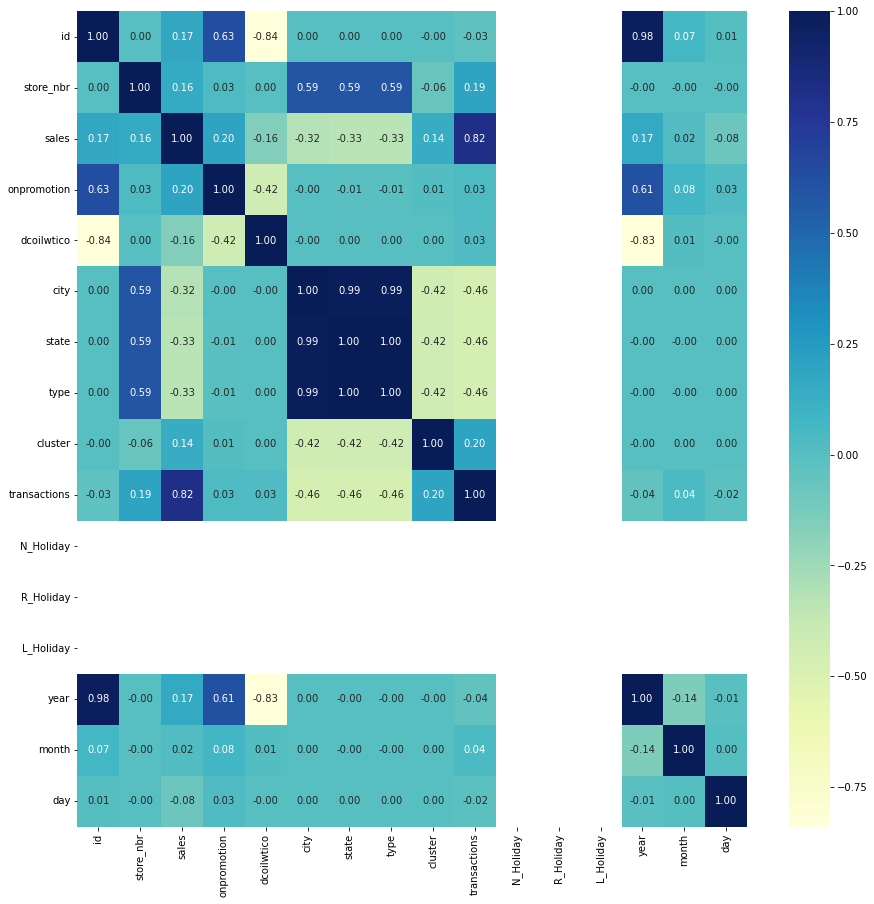

DAIRY


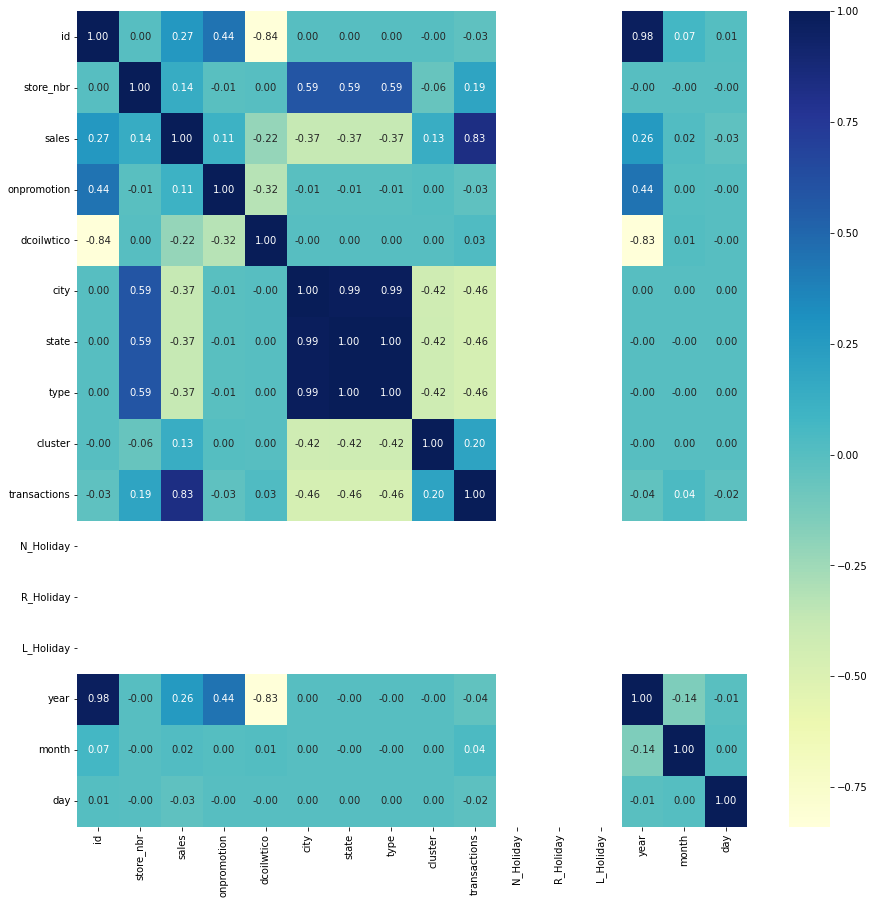

DELI


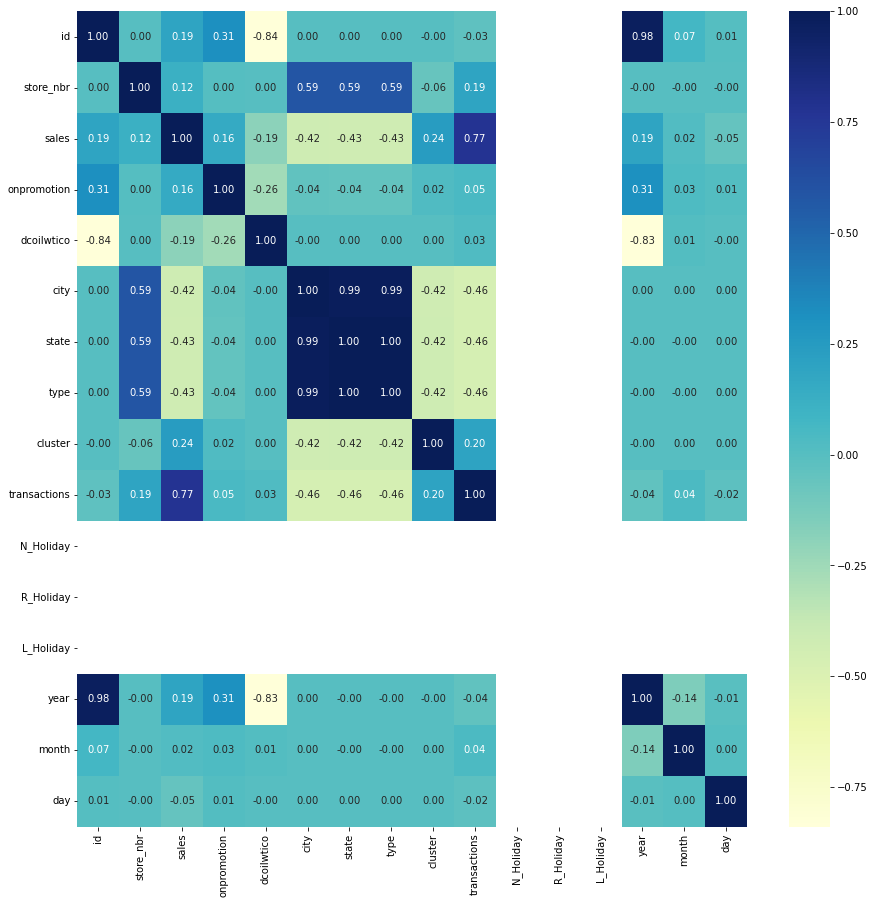

EGGS


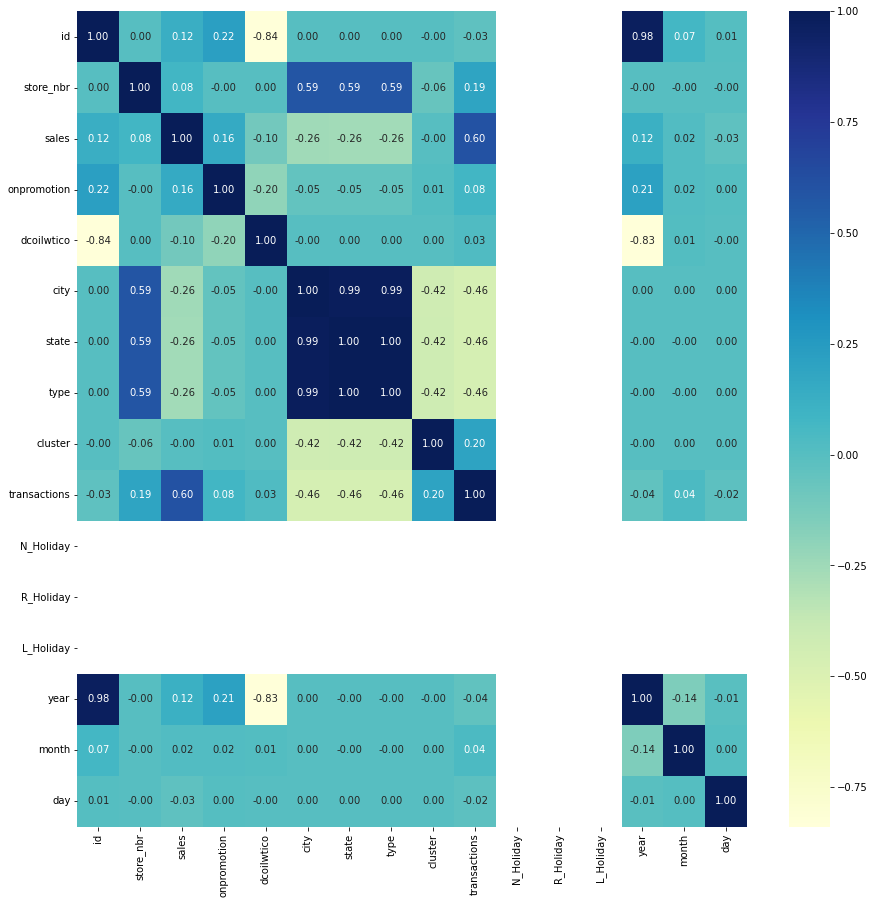

FROZEN FOODS


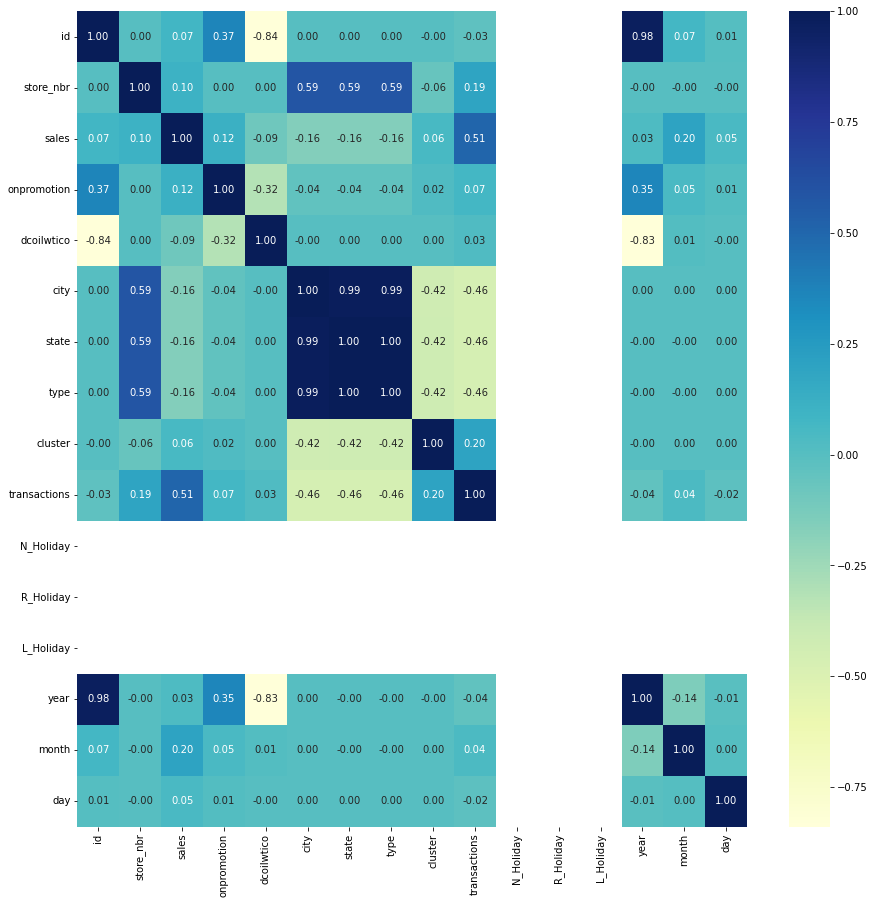

GROCERY I


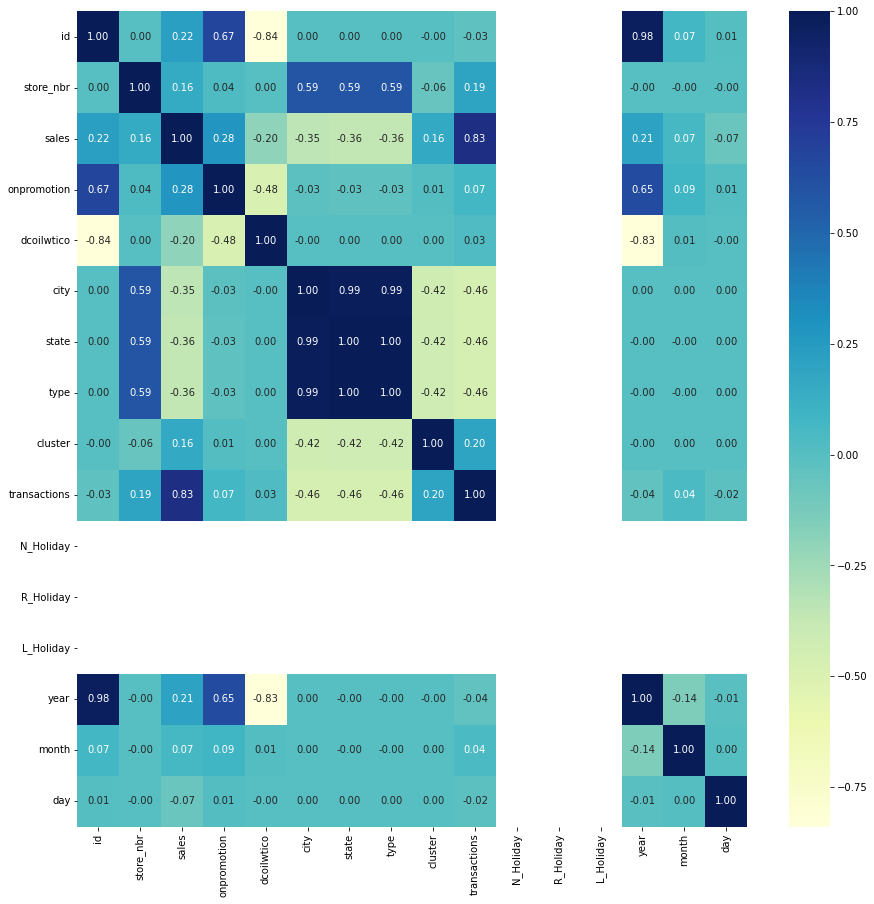

GROCERY II


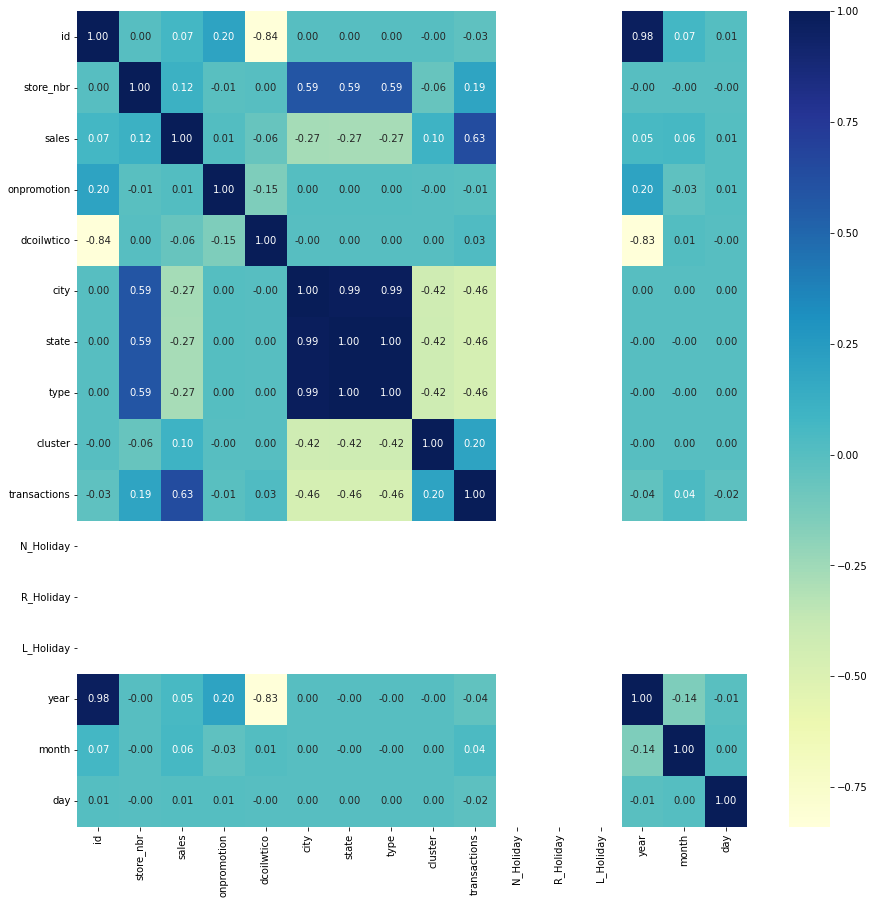

HARDWARE


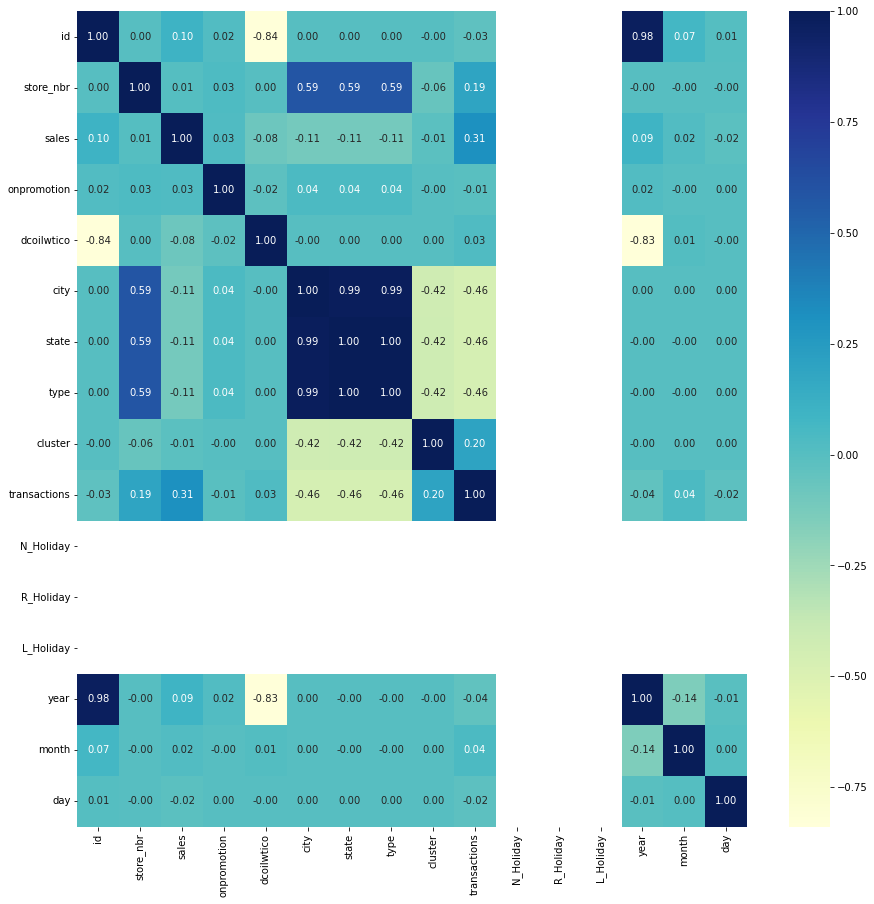

HOME AND KITCHEN I


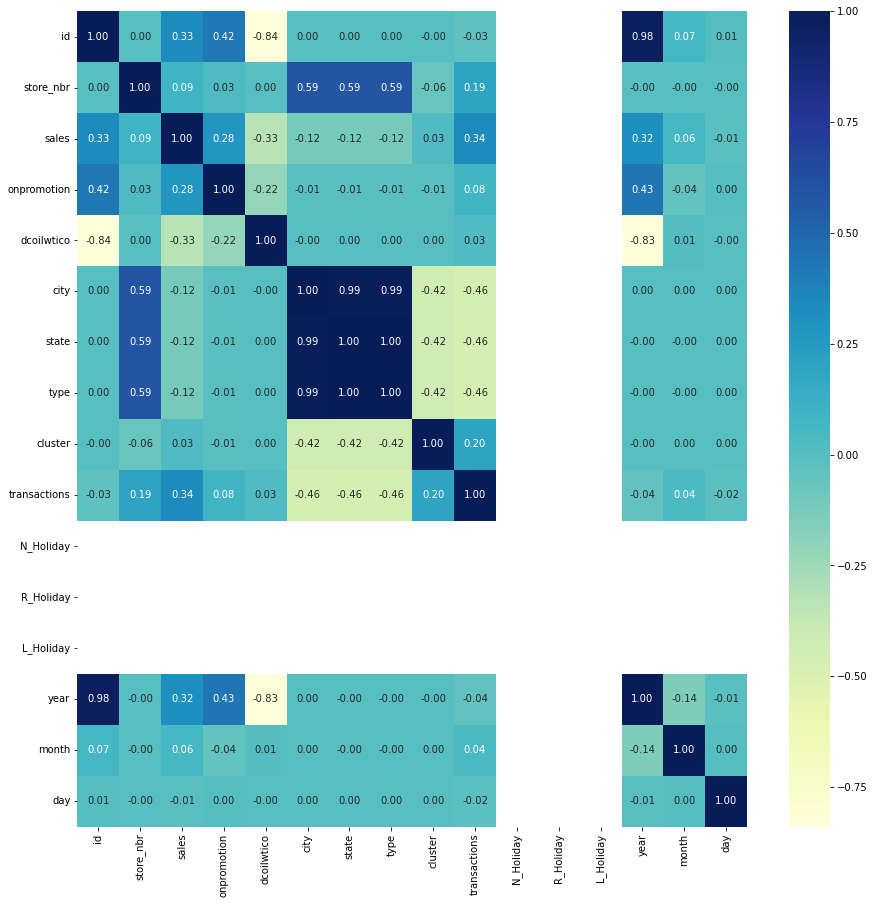

HOME AND KITCHEN II


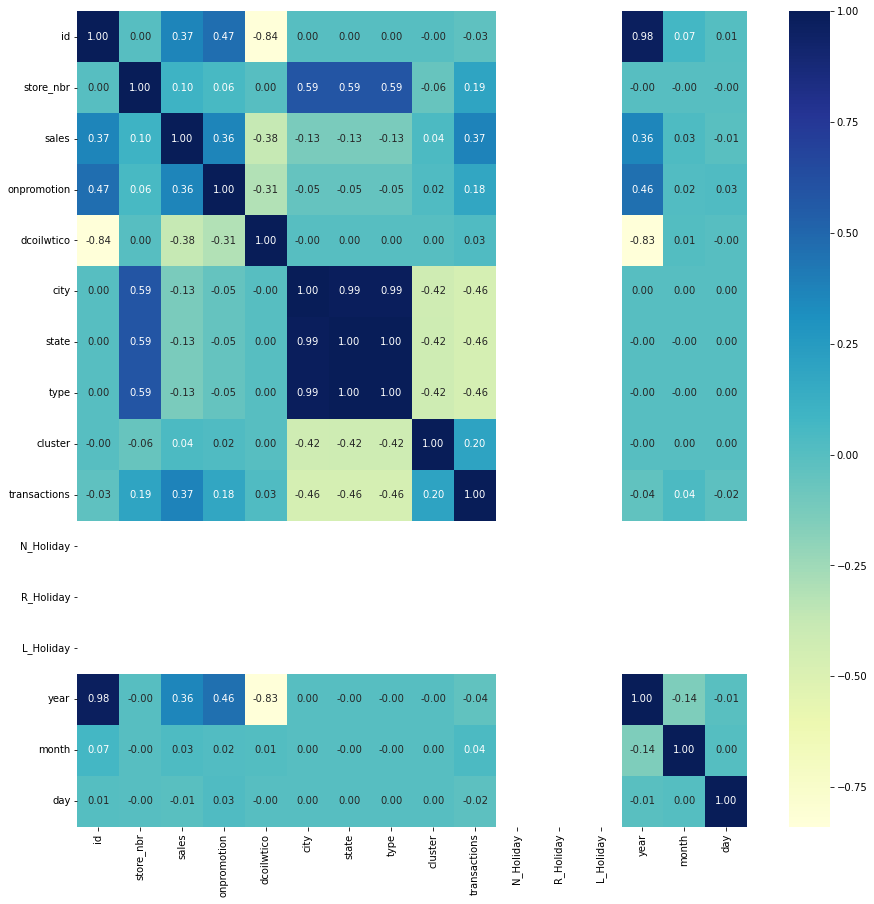

HOME APPLIANCES


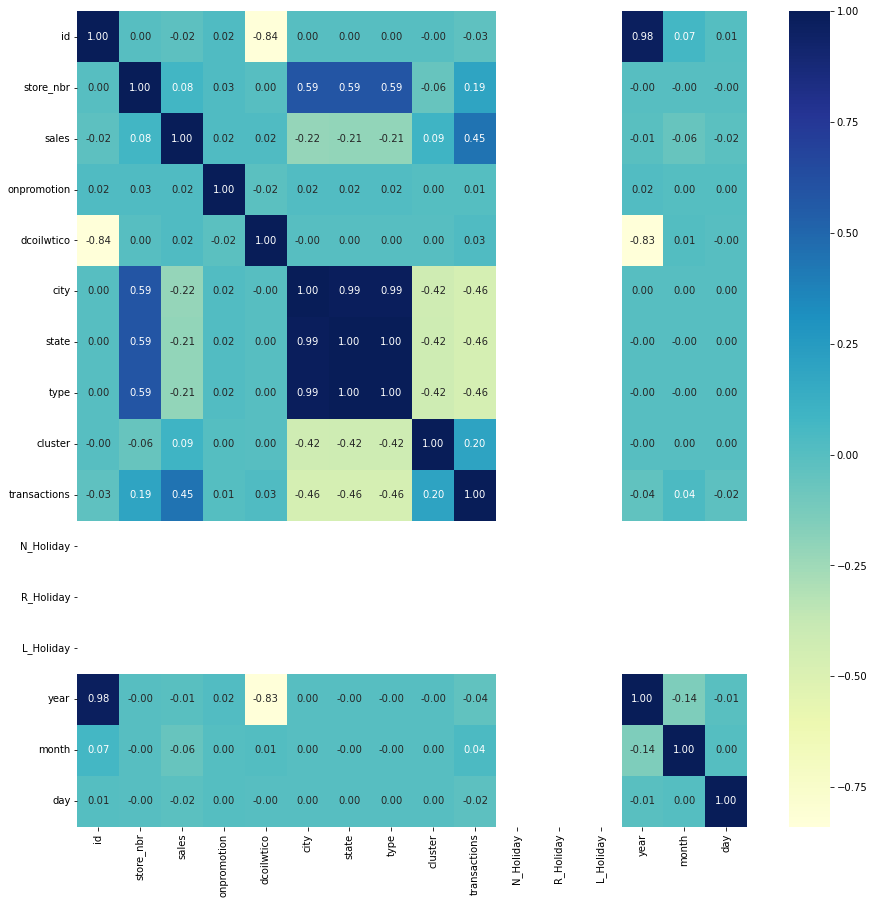

HOME CARE


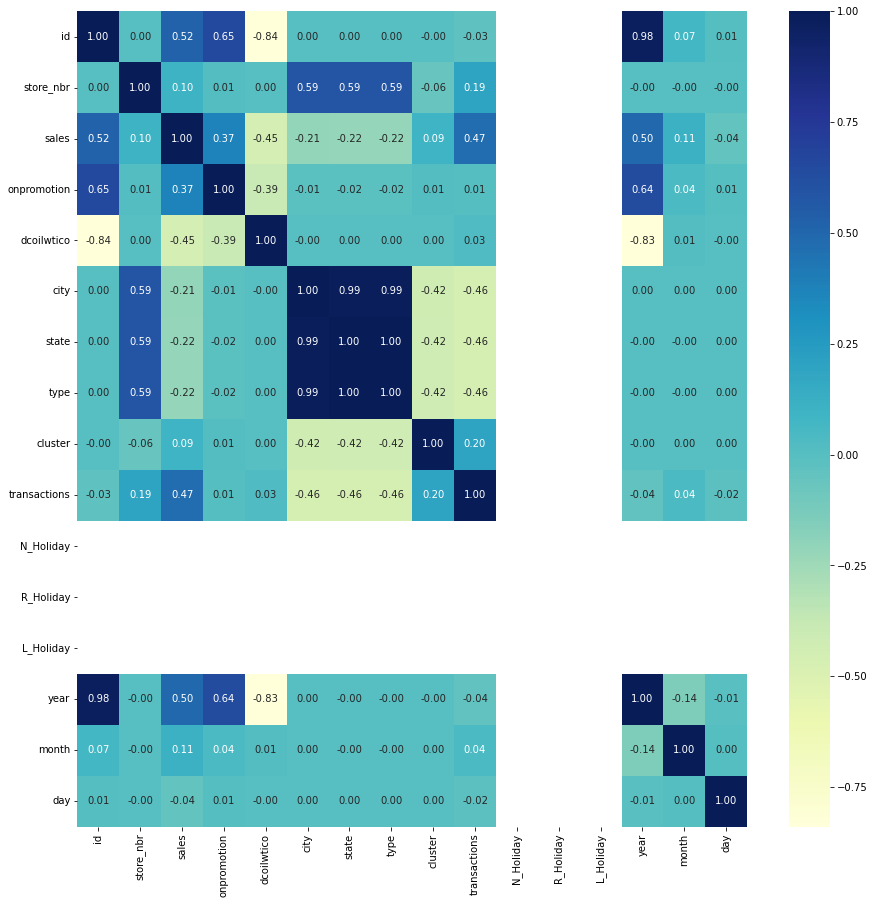

LADIESWEAR


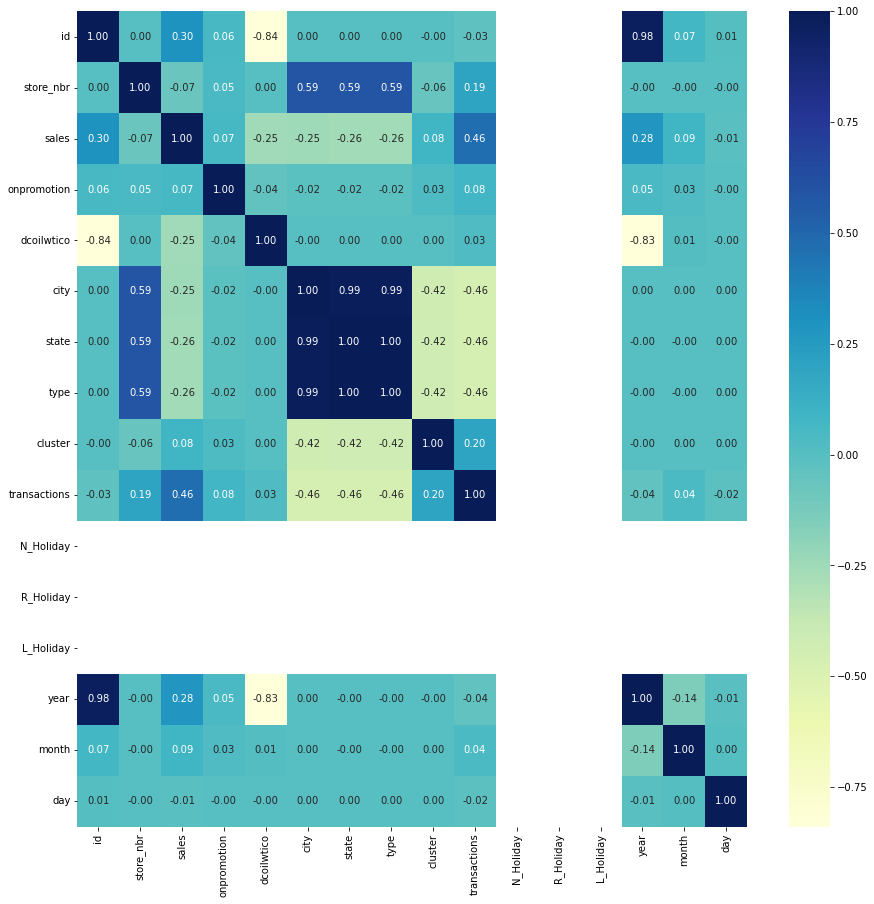

LAWN AND GARDEN


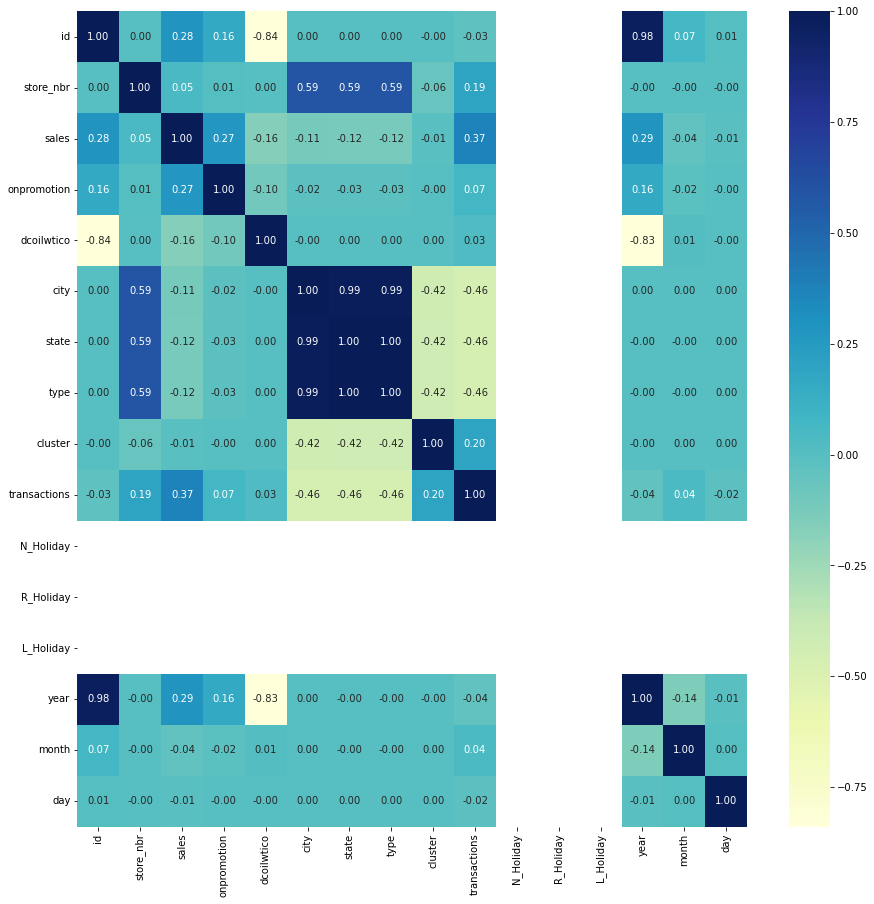

LINGERIE


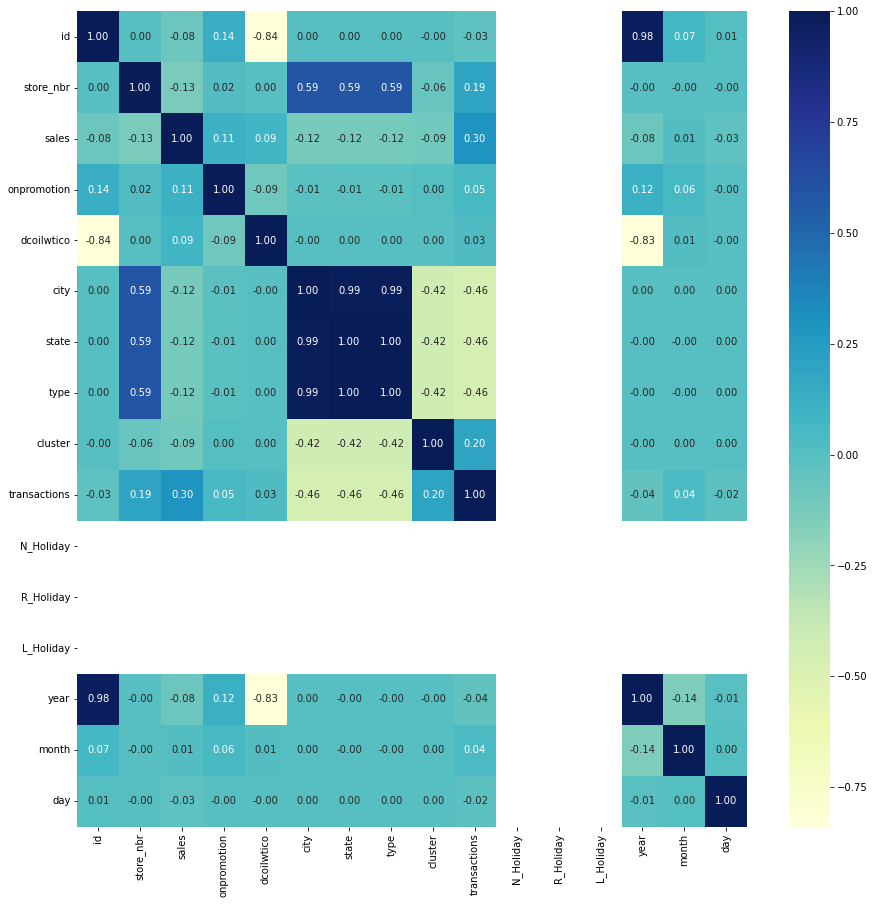

LIQUOR,WINE,BEER


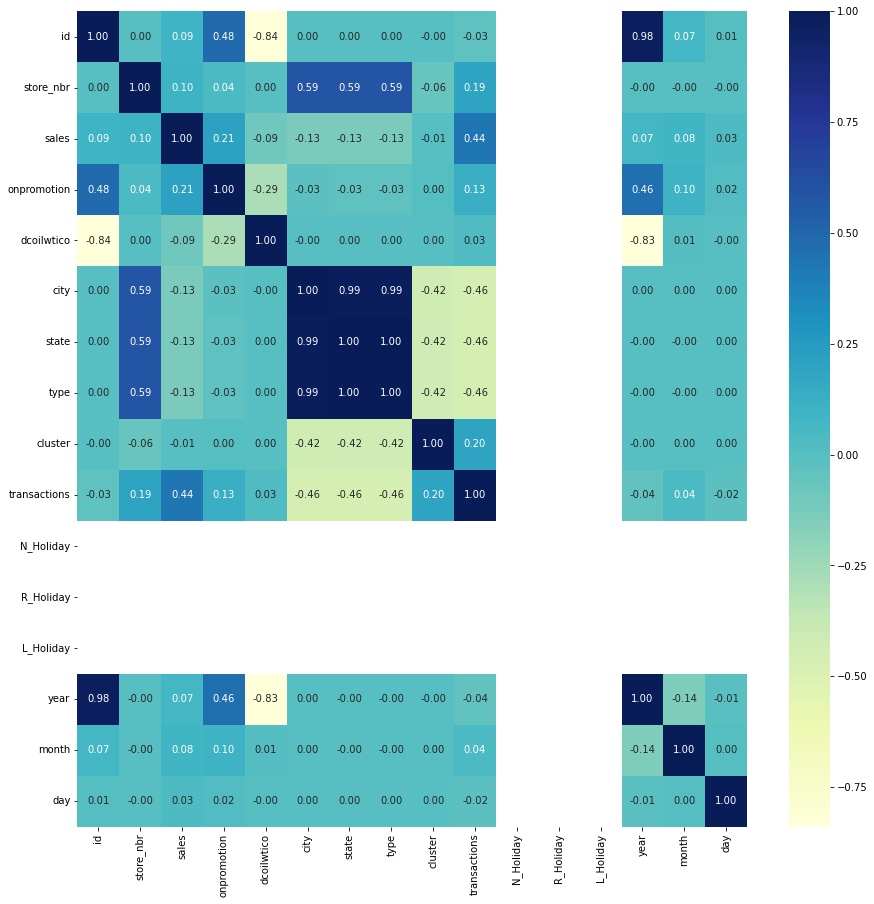

MAGAZINES


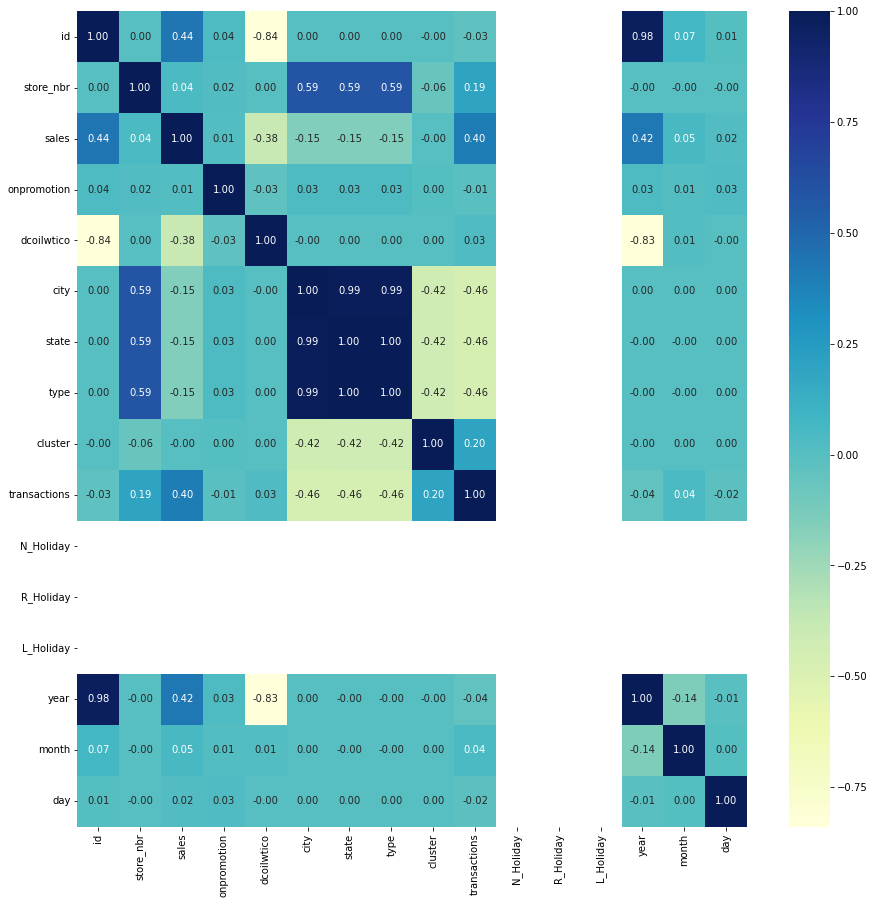

MEATS


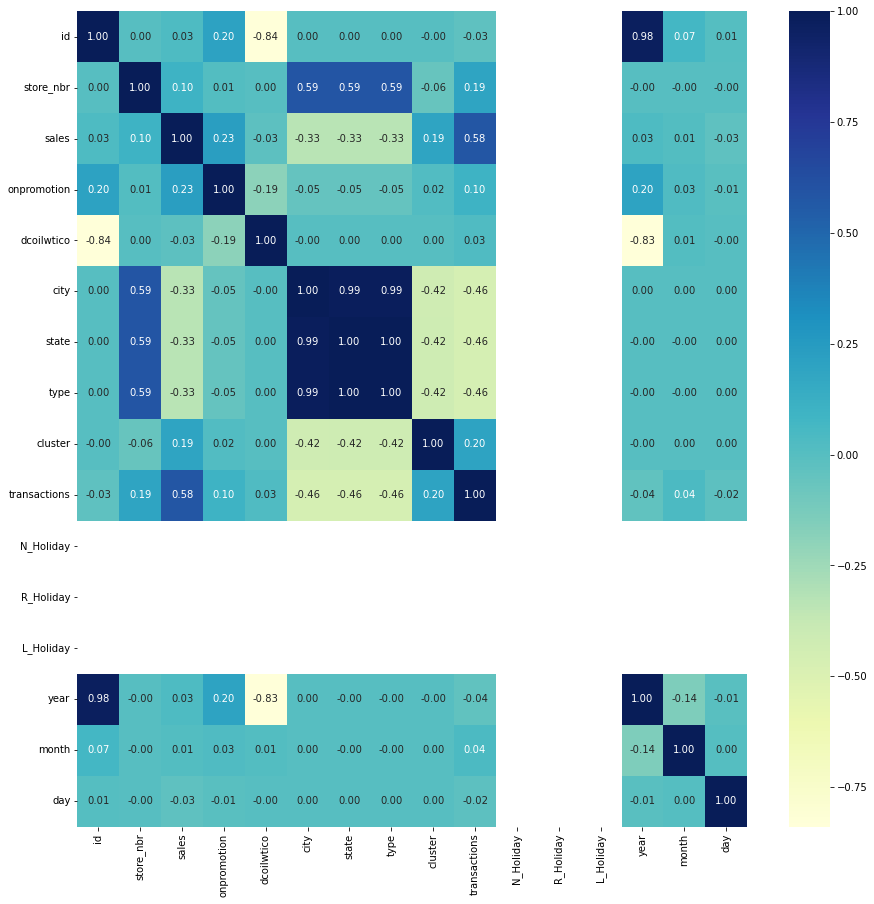

PERSONAL CARE


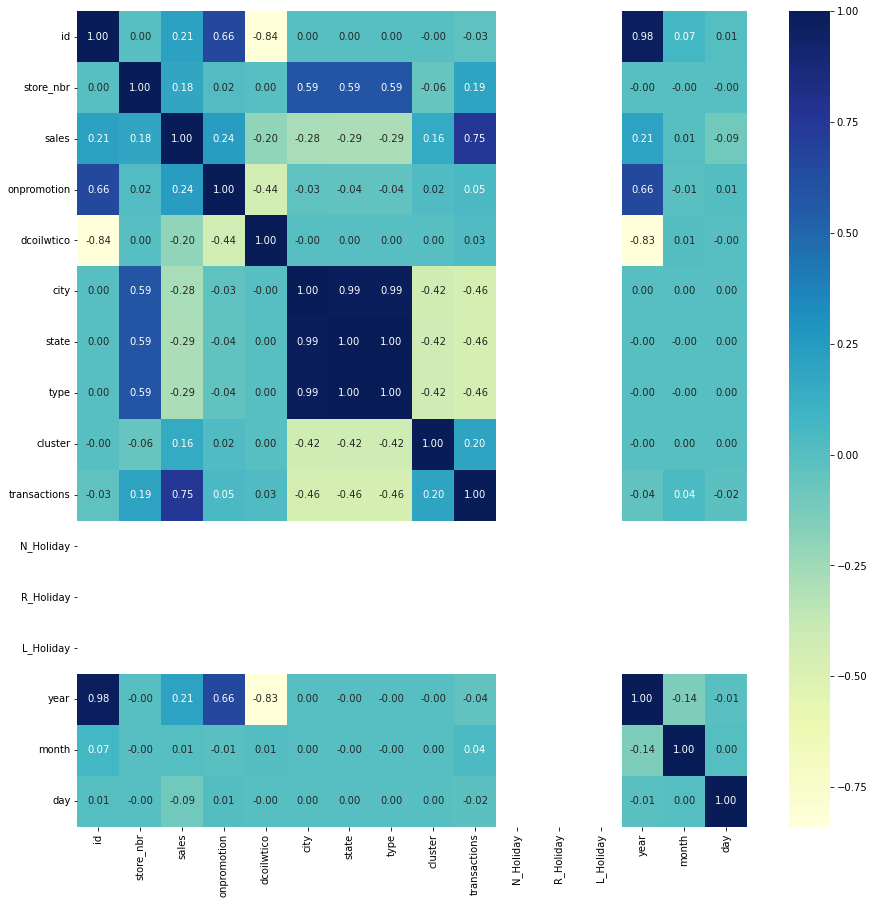

PET SUPPLIES


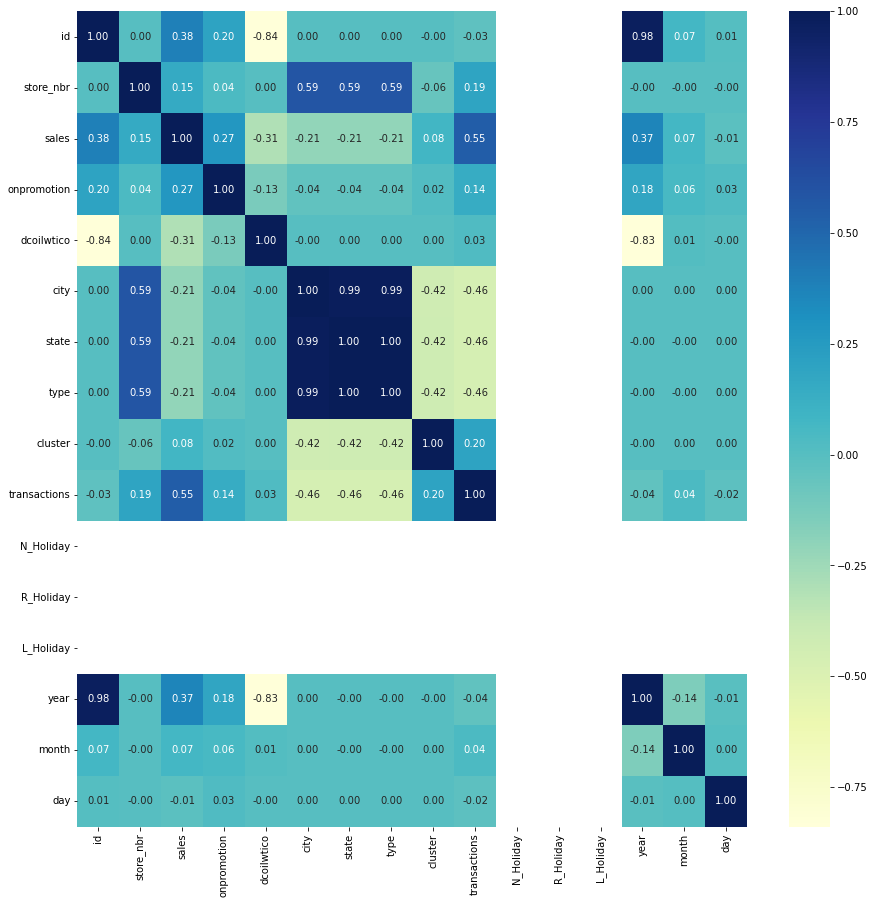

PLAYERS AND ELECTRONICS


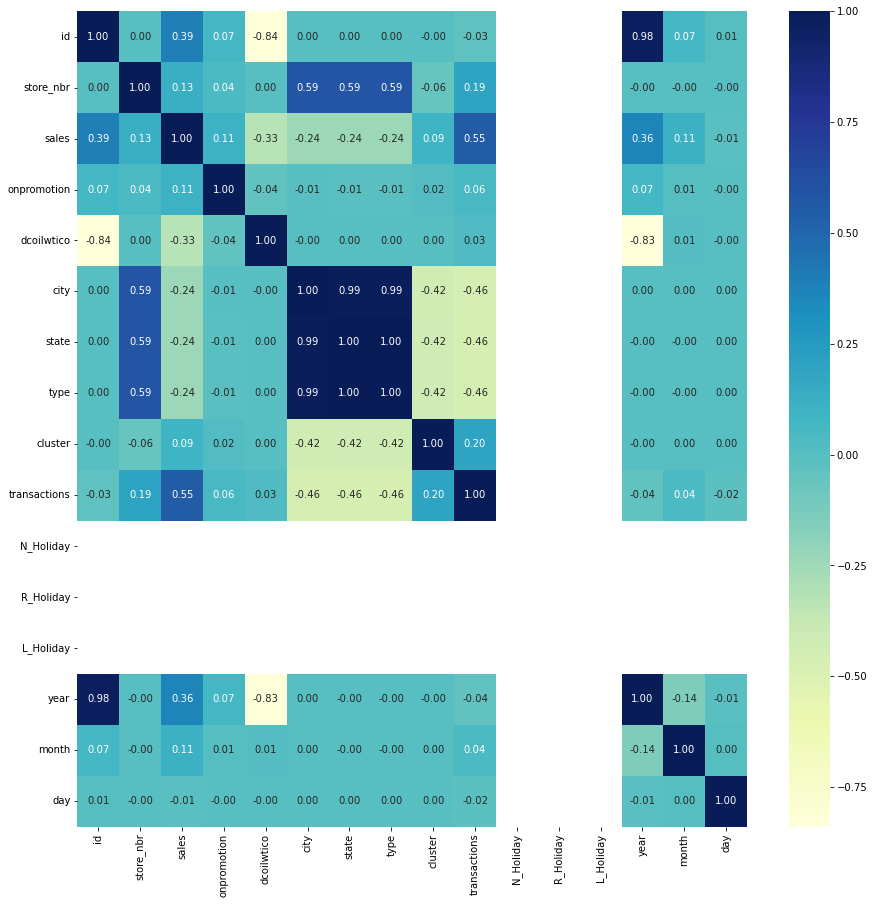

POULTRY


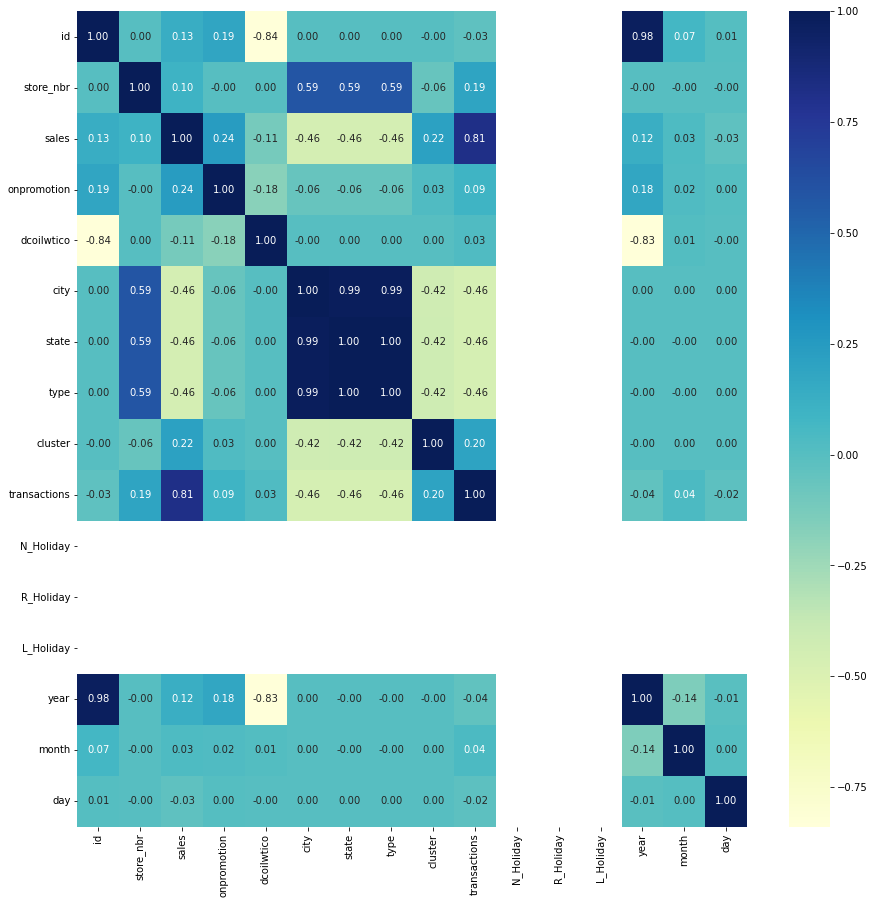

PREPARED FOODS


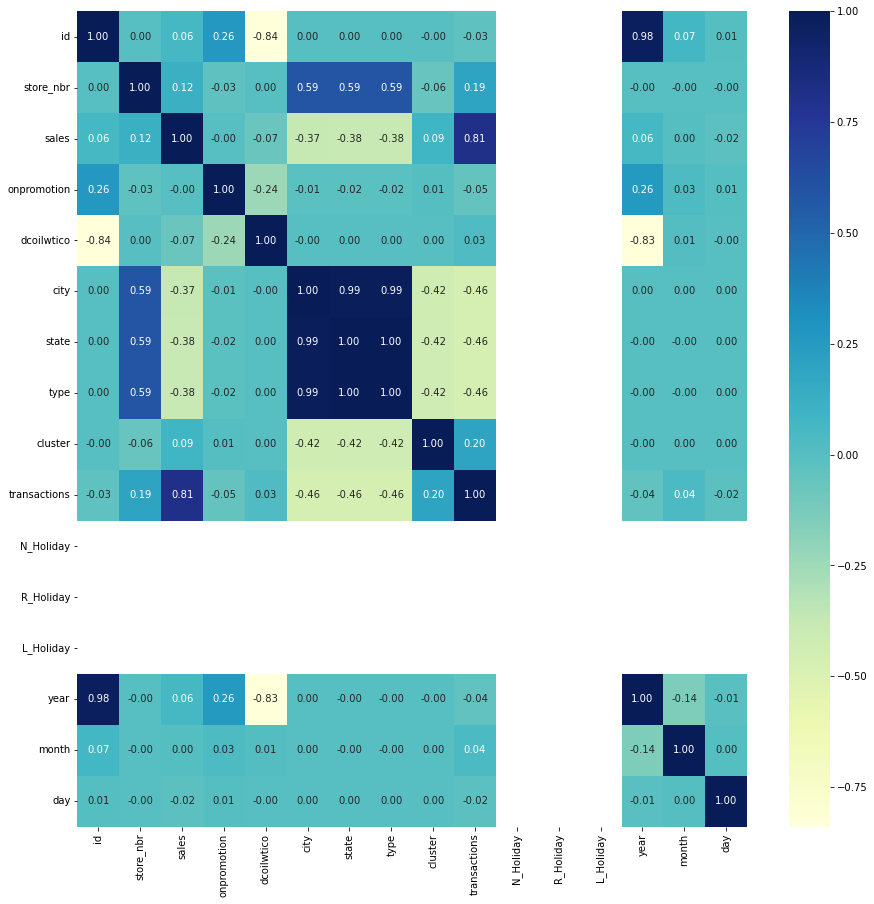

PRODUCE


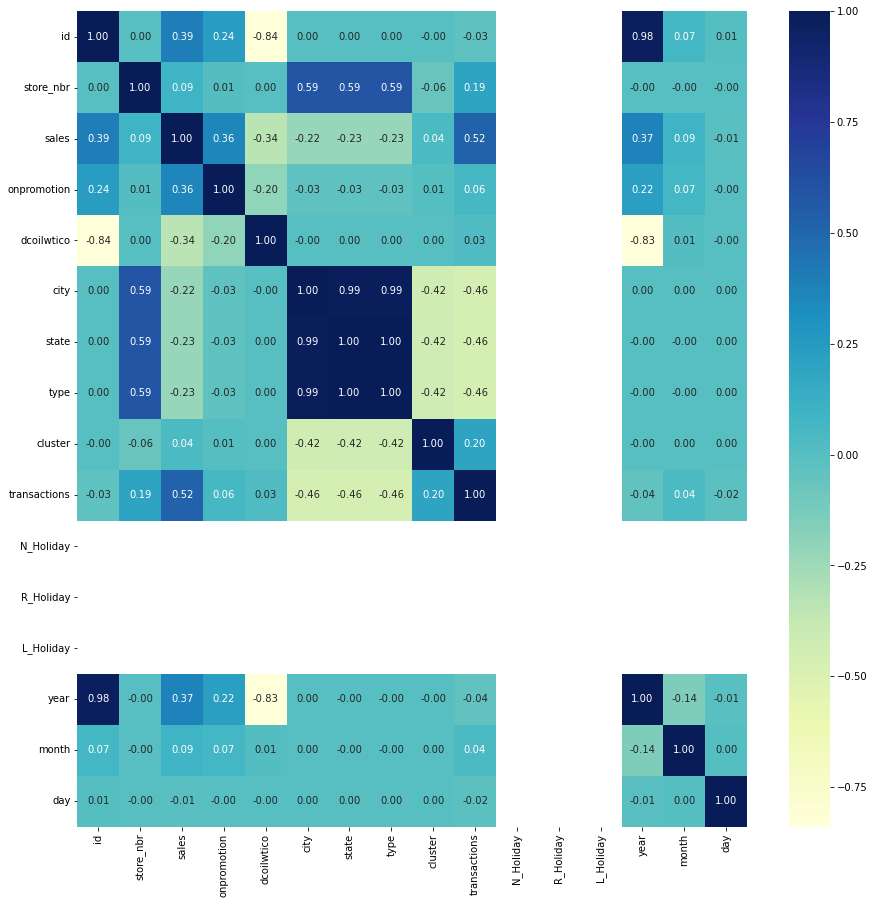

SCHOOL AND OFFICE SUPPLIES


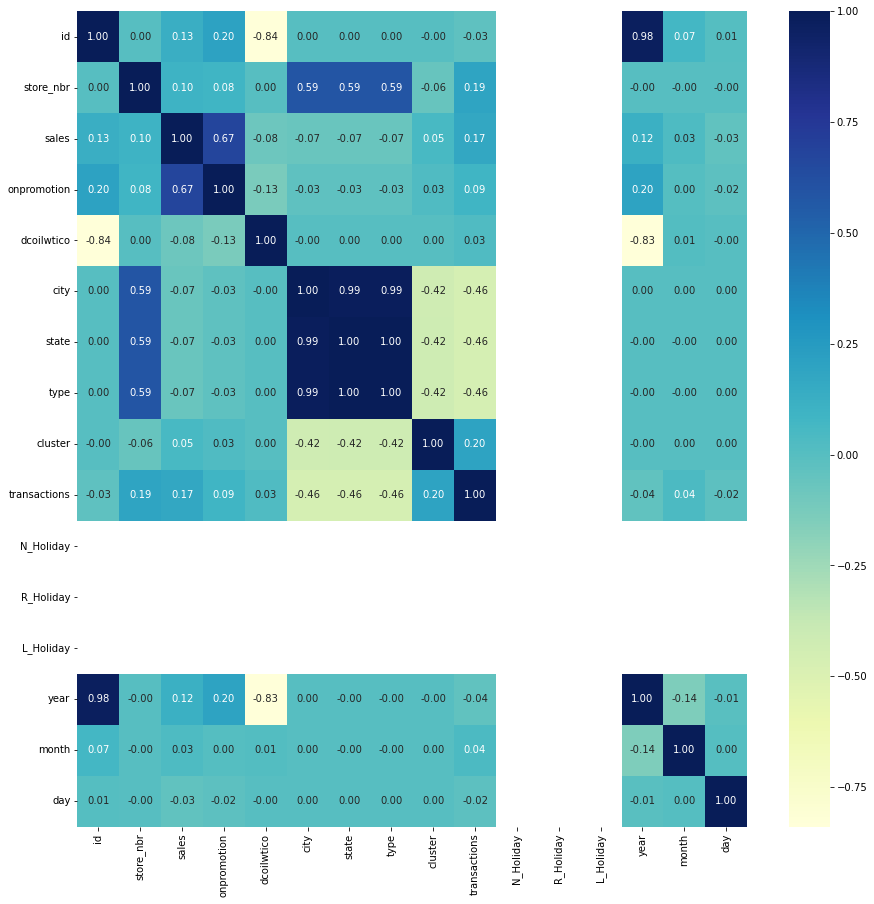

SEAFOOD


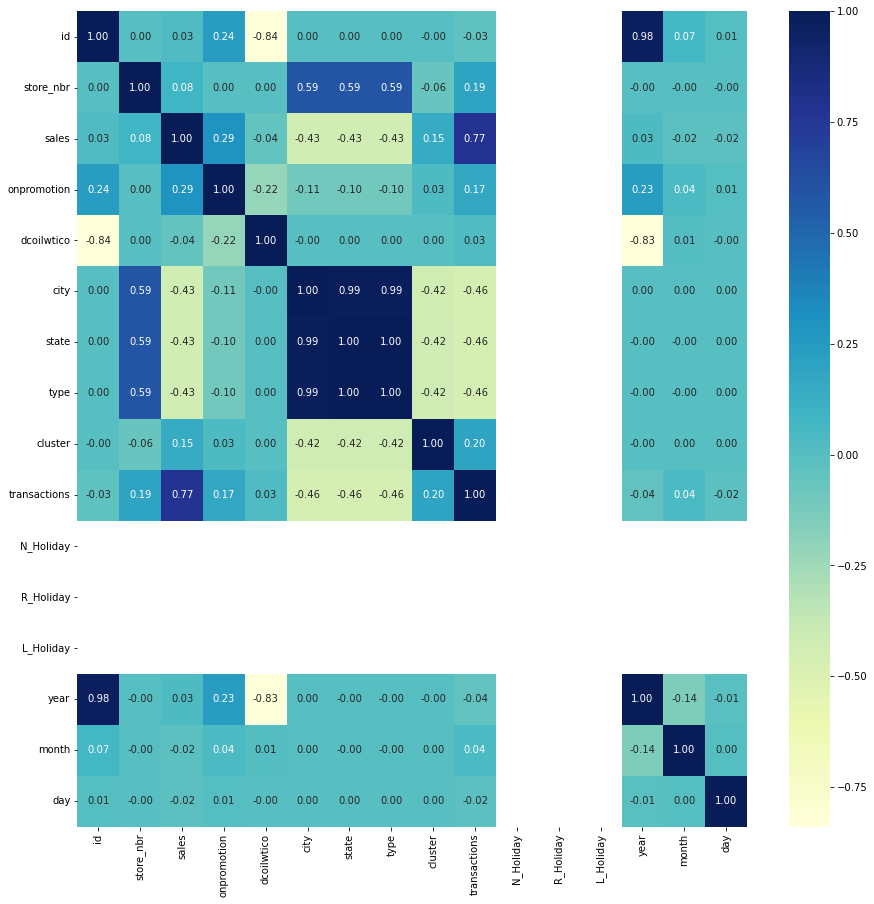

In [56]:
dfs = {}
corr_plot={}
for name, family in merged_Final.groupby('family'):
    dfs[name] = family.copy()
    plt.figure(figsize=(15,15))
    corr_plot[name]=dfs[name].corr()
    sns.heatmap(corr_plot[name],cmap="YlGnBu", annot=True, fmt='.2f')
    print(name)
    plt.show()

In [57]:
dfs['AUTOMOTIVE'].head(2)
dfs['AUTOMOTIVE'].shape

(90936, 18)

In [58]:
pip install xgboost

In [61]:
unique_values=set(merged_Final['family'].unique())
x={}
y={}
for i,j in enumerate(unique_values):
    x[j]=dfs[j].drop(['sales','id','family','transactions','date'],axis=1)
    y[j]=dfs[j][['sales']]
    
    
    
   

In [62]:
from sklearn.model_selection import train_test_split
x_train={}
x_test={}
y_train={}
y_test={}
for j in unique_values:
    x_train[j],x_test[j],y_train[j],y_test[j]=train_test_split(x[j],y[j],test_size=0.3,random_state=0)


In [63]:
from xgboost import XGBRegressor

In [64]:
 model={}
for j in unique_values:
    model[j] = XGBRegressor(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)
    model[j].fit(x_train[j], y_train[j])
    
    

In [65]:
y_pred={}
for j in unique_values:
    y_pred[j] = model[j].predict(x_test[j])
    

In [66]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error


In [67]:
for i in unique_values:
    mse=mean_squared_error(y_pred[i],y_test[i])
    print(i)
    print(mse)


    


CLEANING
173099.99709191822
LAWN AND GARDEN
79.41865037821185
MAGAZINES
13.091854013574551
BABY CARE
0.7454514289854264
SEAFOOD
163.36080223215197
BOOKS
0.17152037332137668
SCHOOL AND OFFICE SUPPLIES
134.2201168695539
BREAD/BAKERY
33787.583534056605
HOME CARE
13451.454683704393
PREPARED FOODS
1878.9798825386345
PLAYERS AND ELECTRONICS
44.396125387133104
DAIRY
86186.5406023618
LADIESWEAR
88.80079552811596
PRODUCE
1123880.7103903196
GROCERY II
214.43313278170942
CELEBRATION
203.9371719502468
HOME AND KITCHEN II
713.1679509369213
PERSONAL CARE
17926.766819471257
LINGERIE
70.55970642785589
BEVERAGES
1452188.597439676
MEATS
24797.97716891807
PET SUPPLIES
18.244988984965843
HARDWARE
2.253324158727666
DELI
13332.464997826803
FROZEN FOODS
30337.280421171457
AUTOMOTIVE
22.198655486268255
HOME AND KITCHEN I
813.3449083892941
BEAUTY
9.000264285734769
EGGS
9617.554248714983
GROCERY I
2949194.7176624015
HOME APPLIANCES
0.6978171320396209
LIQUOR,WINE,BEER
9559.118151083927
POULTRY
33032.42743066461


In [68]:
#Hyperparameter Tuning
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'subsample': [0.5, 0.75, 1],
}
xgb_model={}
for i in unique_values:
    xgb_model[i]=XGBRegressor(objective='reg:squarederror')
    
    
    

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search={}
for i in unique_values:
    grid_search[i]=GridSearchCV(xgb_model[i], param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search[i].fit(x_train[i],y_train[i])
   


In [78]:
best_model={}
for i in unique_values:
    best_model[i]=XGBRegressor(**grid_search[i].best_params_)
    best_model[i].fit(x_train[i],y_train[i])
    

In [81]:
y_pred1={}
for i in unique_values:
    y_pred1[i]=best_model[i].predict(x_test[i])

In [83]:
for i in unique_values:
    mse=mean_squared_error(y_pred1[i],y_test[i])
    print(i)
    print(mse)

BEVERAGES
445282.77639269
HOME APPLIANCES
0.6227390267862216
LIQUOR,WINE,BEER
7913.011053501838
MAGAZINES
7.5348597639928006
POULTRY
15653.323091240803
HOME CARE
4161.955560178772
PERSONAL CARE
7669.750020988923
PREPARED FOODS
728.9388959735708
BREAD/BAKERY
11470.445228713263
PET SUPPLIES
9.315412476742912
PLAYERS AND ELECTRONICS
21.61317710315421
MEATS
22084.196261379348
LADIESWEAR
38.955809870807556
DELI
4312.220256887089
EGGS
4252.503840391249
GROCERY II
216.30703910980193
SEAFOOD
86.69425384010717
BEAUTY
5.88538669689645
HOME AND KITCHEN I
773.9169654295513
HOME AND KITCHEN II
521.4942979525867
BOOKS
0.11163281605233717
CLEANING
75097.12022167856
LAWN AND GARDEN
48.164468957768875
BABY CARE
0.6903819539046395
DAIRY
26363.245257480816
FROZEN FOODS
17866.875038825765
HARDWARE
2.087319811175637
SCHOOL AND OFFICE SUPPLIES
105.59626973638166
AUTOMOTIVE
16.68117542544558
CELEBRATION
189.06626207368888
LINGERIE
58.00787878366668
PRODUCE
257450.72459861147
GROCERY I
1591693.296895904


In [84]:
#Training data prediction
y_pred2={}
for i in unique_values:
    y_pred2[i]=best_model[i].predict(x_train[i])

In [88]:
for i in unique_values:
    mse=mean_squared_error(y_pred2[i],y_train[i])
    if mse<=100:
        print(i)
        print(mse)
    
        
    

HOME APPLIANCES
0.5354012879215175
MAGAZINES
5.993885284756312
PET SUPPLIES
7.525333115552802
PLAYERS AND ELECTRONICS
18.280499340458956
LADIESWEAR
34.103285218453976
SEAFOOD
72.86182164345122
BEAUTY
5.576026295169922
BOOKS
0.0712282514577848
LAWN AND GARDEN
25.737222869005006
BABY CARE
0.17016855891038693
HARDWARE
1.7049479150452156
SCHOOL AND OFFICE SUPPLIES
28.398242997578347
AUTOMOTIVE
12.978018436997989
LINGERIE
33.96968340196609
